# K-Means 클러스터링

독립 변수의 특성이 유사한 데이터의 그룹을 클러스터(cluster)라고 한다.
주어진 데이터를 여러개의 클러스터로 구분하는 것을 클러스터링(clustering)이라고 한다. 만약 클러스터의 갯수가 $K$라면 클러스터링은 모든 데이터에 대해 각 데이터가 1번부터 $K$번 클러스터 중에 어떤 클러스터에 속하는지 예측하는 작업이다.

## K-Means

K-Means 클러스터링 알고리즘은 가장 단순하고 빠른 클러스터링 알고리즘의 하나이다. 

기본적인 방법은 다음과 같은 목적함수 값이 최소화될 때까지 클러스터의 중심(centroid) $\mu_k$과 각 데이터가 소속될 클러스터를 반복해서 찾는 것이다. 이 값을 inertia라고도 한다.

$$ J = \sum_{k=1}^K \sum_{i \in C_k} d(x_i, \mu_k)  $$

이 식에서 $d$는 두 데이터의 비유사도(dissimilarity) 혹은 거리(distance)로 다음과 같이 정의한다.

$$ d(x_i, \mu_k) = || x_i - \mu_k ||^2 $$

세부 알고리즘은 다음과 같다.


1. 임의의 중심값 $\mu_k$ 를 고른다. (보통 데이터 샘플 중의 하나를 선택)
2. 중심에서 각 샘플 데이터까지의 거리를 계산
3. 각 데이터 샘플에서 가장 가까운 중심을 선택하여 클러스터 갱신
4. 다시 만들어진 클러스터에 대해 중심을 다시 계산하고 1 ~ 4를 반복한다.

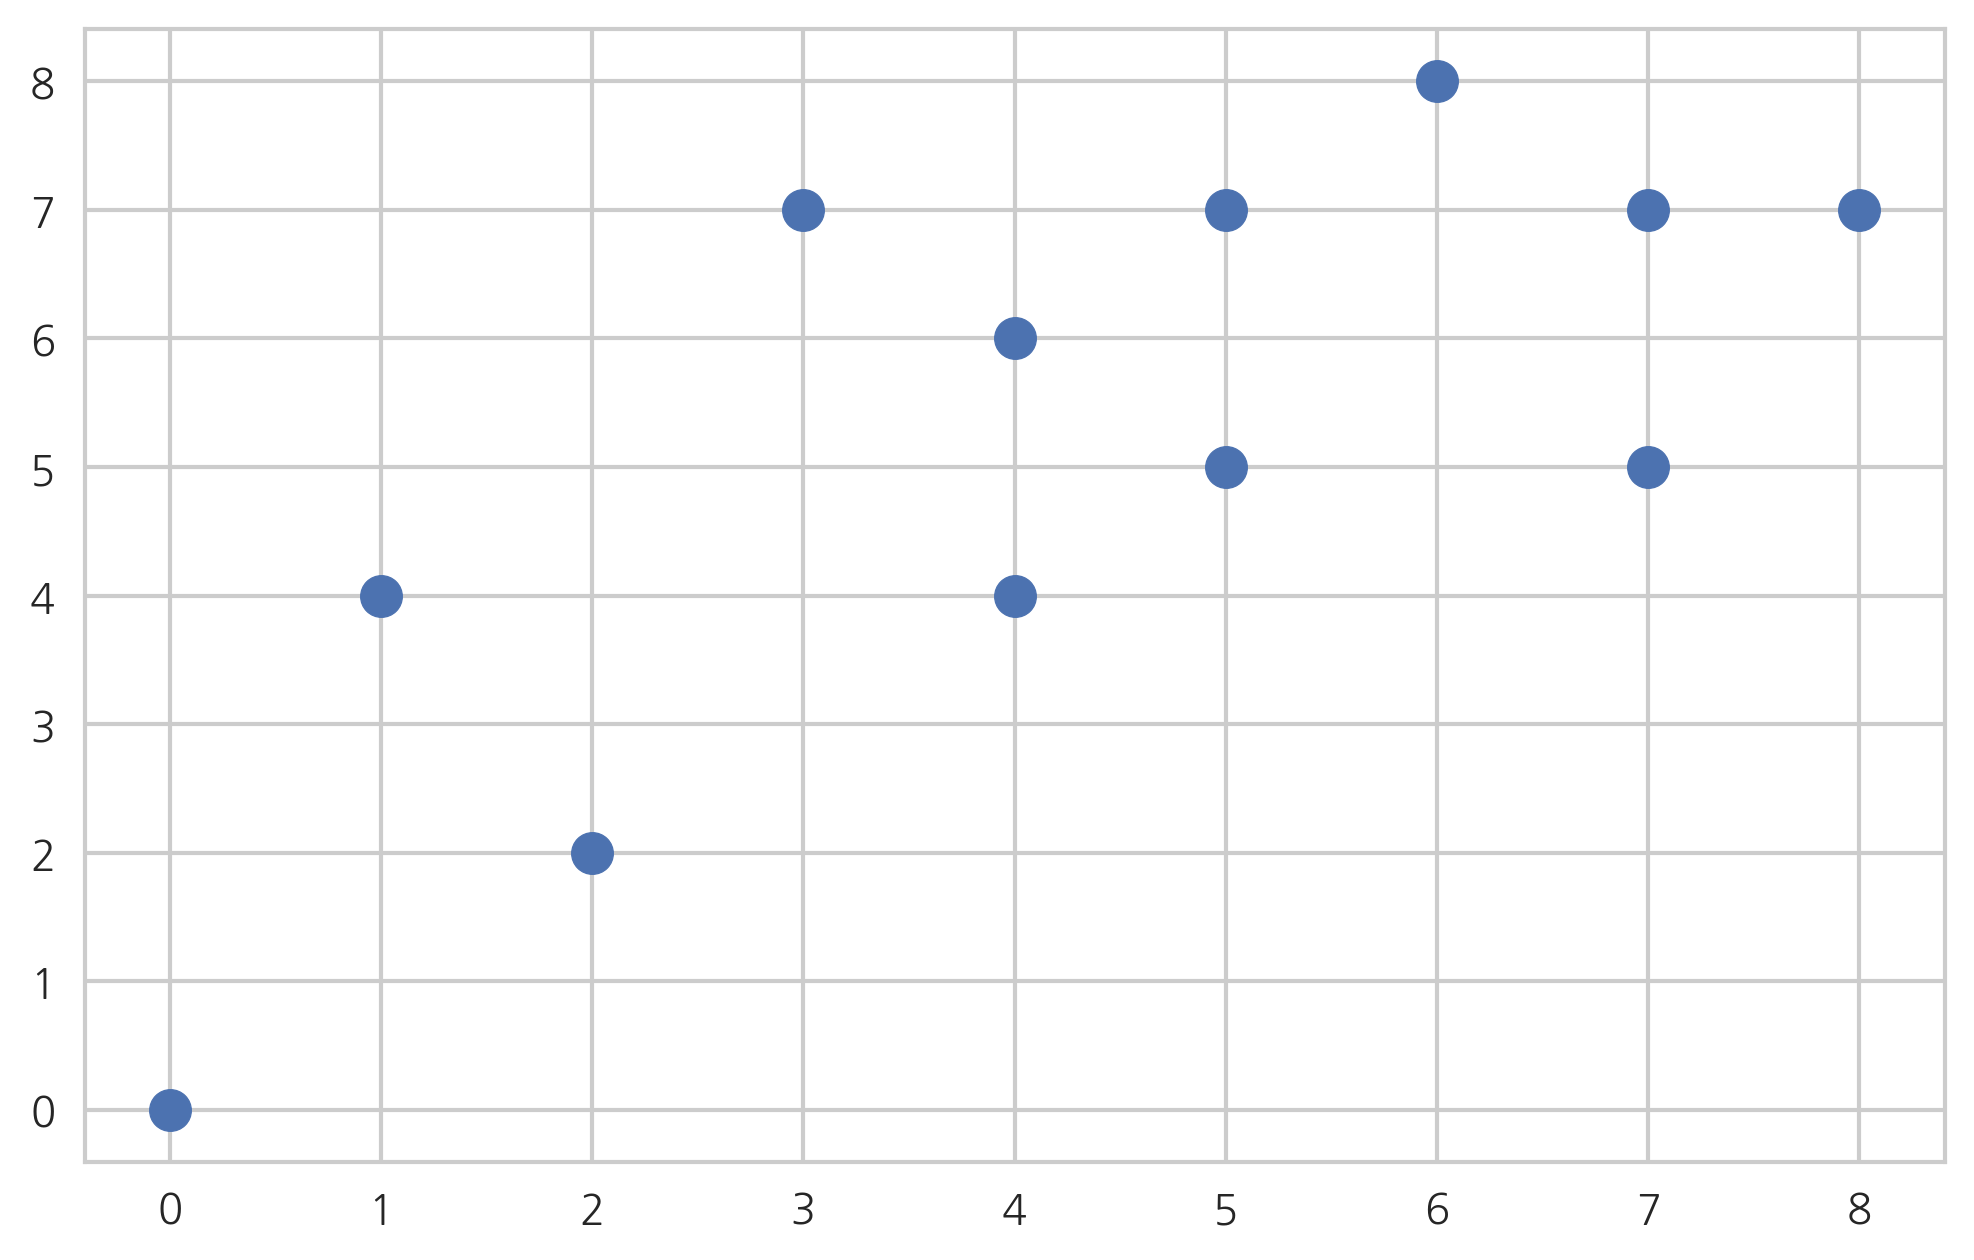

In [1]:
X = np.array([[7, 5], [5, 7], [7, 7], [4, 4], [4, 6], [1, 4],
              [0, 0], [2, 2], [8, 7], [6, 8], [5, 5], [3, 7]])
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

In [2]:
from sklearn.cluster import KMeans

### 1회차

In [3]:
model1 = KMeans(n_clusters=2, init="random", n_init=1,
               max_iter=1, random_state=1).fit(X)

In [4]:
c0, c1 = model1.cluster_centers_
c0, c1

(array([ 6.6,  6.8]), array([ 2.71428571,  4.        ]))

In [5]:
model1.score(X)

-63.004081632653012

In [6]:
def plot_cluster(model, c0, c1):
    plt.scatter(X[model.labels_ == 0, 0],
                X[model.labels_ == 0, 1], s=100, marker='v', c='r')
    plt.scatter(X[model.labels_ == 1, 0],
                X[model.labels_ == 1, 1], s=100, marker='^', c='b')
    plt.scatter(c0[0], c0[1], s=200, c="r")
    plt.scatter(c1[0], c1[1], s=200, c="b")
    plt.show()

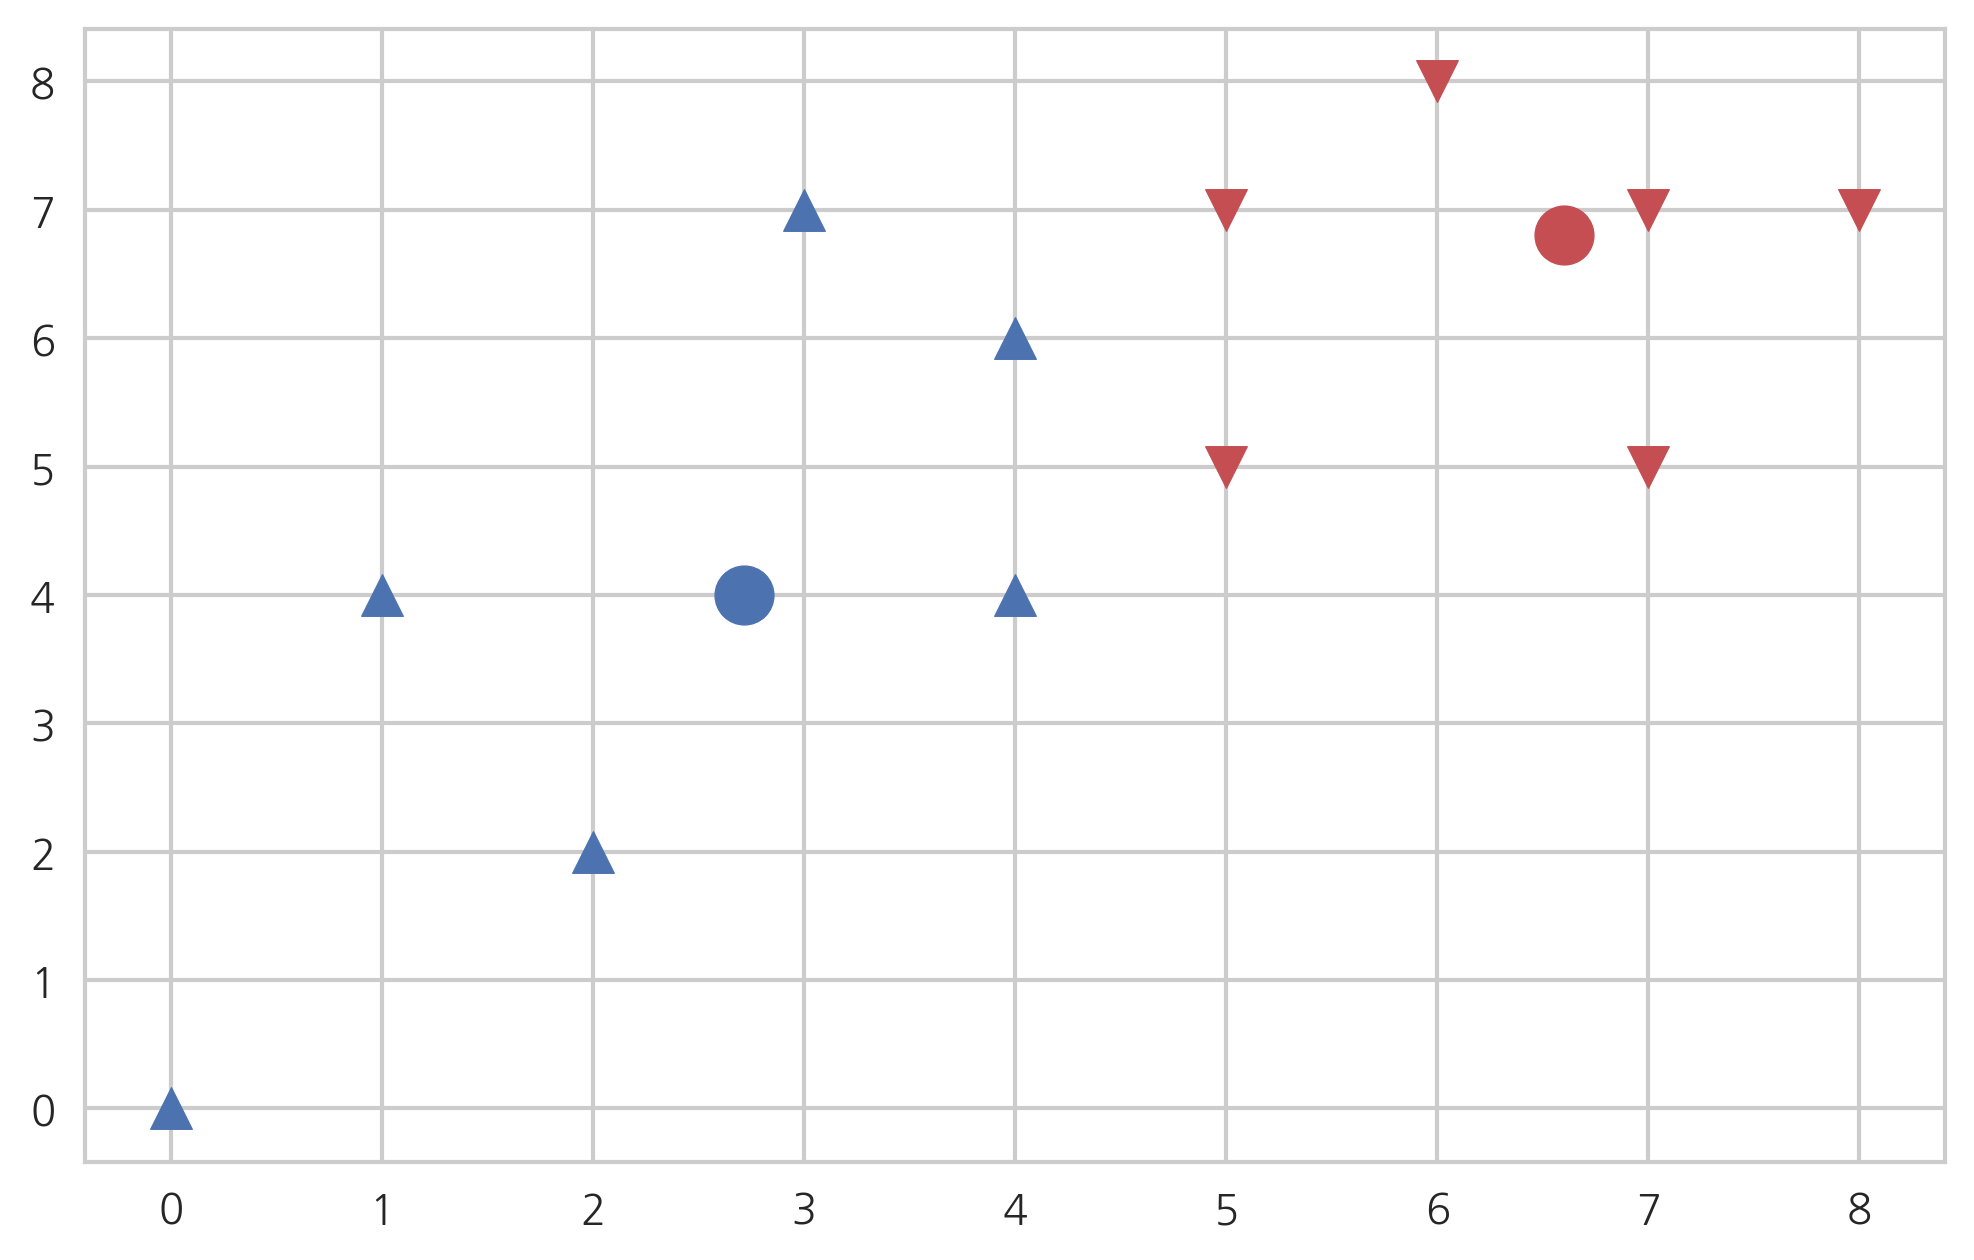

In [7]:
plot_cluster(model1, c0, c1)

In [8]:
def kmeans_df(model, c0, c1):
    df = pd.DataFrame(np.hstack([X,
                                 np.linalg.norm(X - c0, axis=1)[:, np.newaxis],
                                 np.linalg.norm(X - c1, axis=1)[:, np.newaxis],
                                 model.labels_[:, np.newaxis]]),
                      columns=["x0", "x1", "d0", "d1", "c"])
    return df

In [9]:
kmeans_df(model1, c0, c1)

,x0,x1,d0,d1,c
0,7.0,5.0,1.843909,4.400835,0.0
1,5.0,7.0,1.612452,3.771537,0.0
2,7.0,7.0,0.447214,5.231381,0.0
3,4.0,4.0,3.820995,1.285714,1.0
4,4.0,6.0,2.720294,2.377617,1.0
5,1.0,4.0,6.260990,1.714286,1.0
6,0.0,0.0,9.476286,4.833978,1.0
7,2.0,2.0,6.648308,2.123724,1.0
8,8.0,7.0,1.414214,6.077728,0.0
9,6.0,8.0,1.341641,5.176477,0.0


In [10]:
def calc_new_centroid(model):
    c0_new = (X[model.labels_ == 0, 0].mean(), X[model.labels_ == 0, 1].mean())
    c1_new = (X[model.labels_ == 1, 0].mean(), X[model.labels_ == 1, 1].mean())
    return c0_new, c1_new

In [11]:
calc_new_centroid(model1)

((6.333333333333333, 6.5), (2.3333333333333335, 3.8333333333333335))

### 2회차

In [12]:
model2 = KMeans(n_clusters=2, init="random", n_init=1,
               max_iter=2, random_state=1).fit(X)

In [13]:
c0, c1 = model2.cluster_centers_
c0, c1

(array([ 6.33333333,  6.5       ]), array([ 2.33333333,  3.83333333]))

In [14]:
model2.score(X)

-59.222222222222157

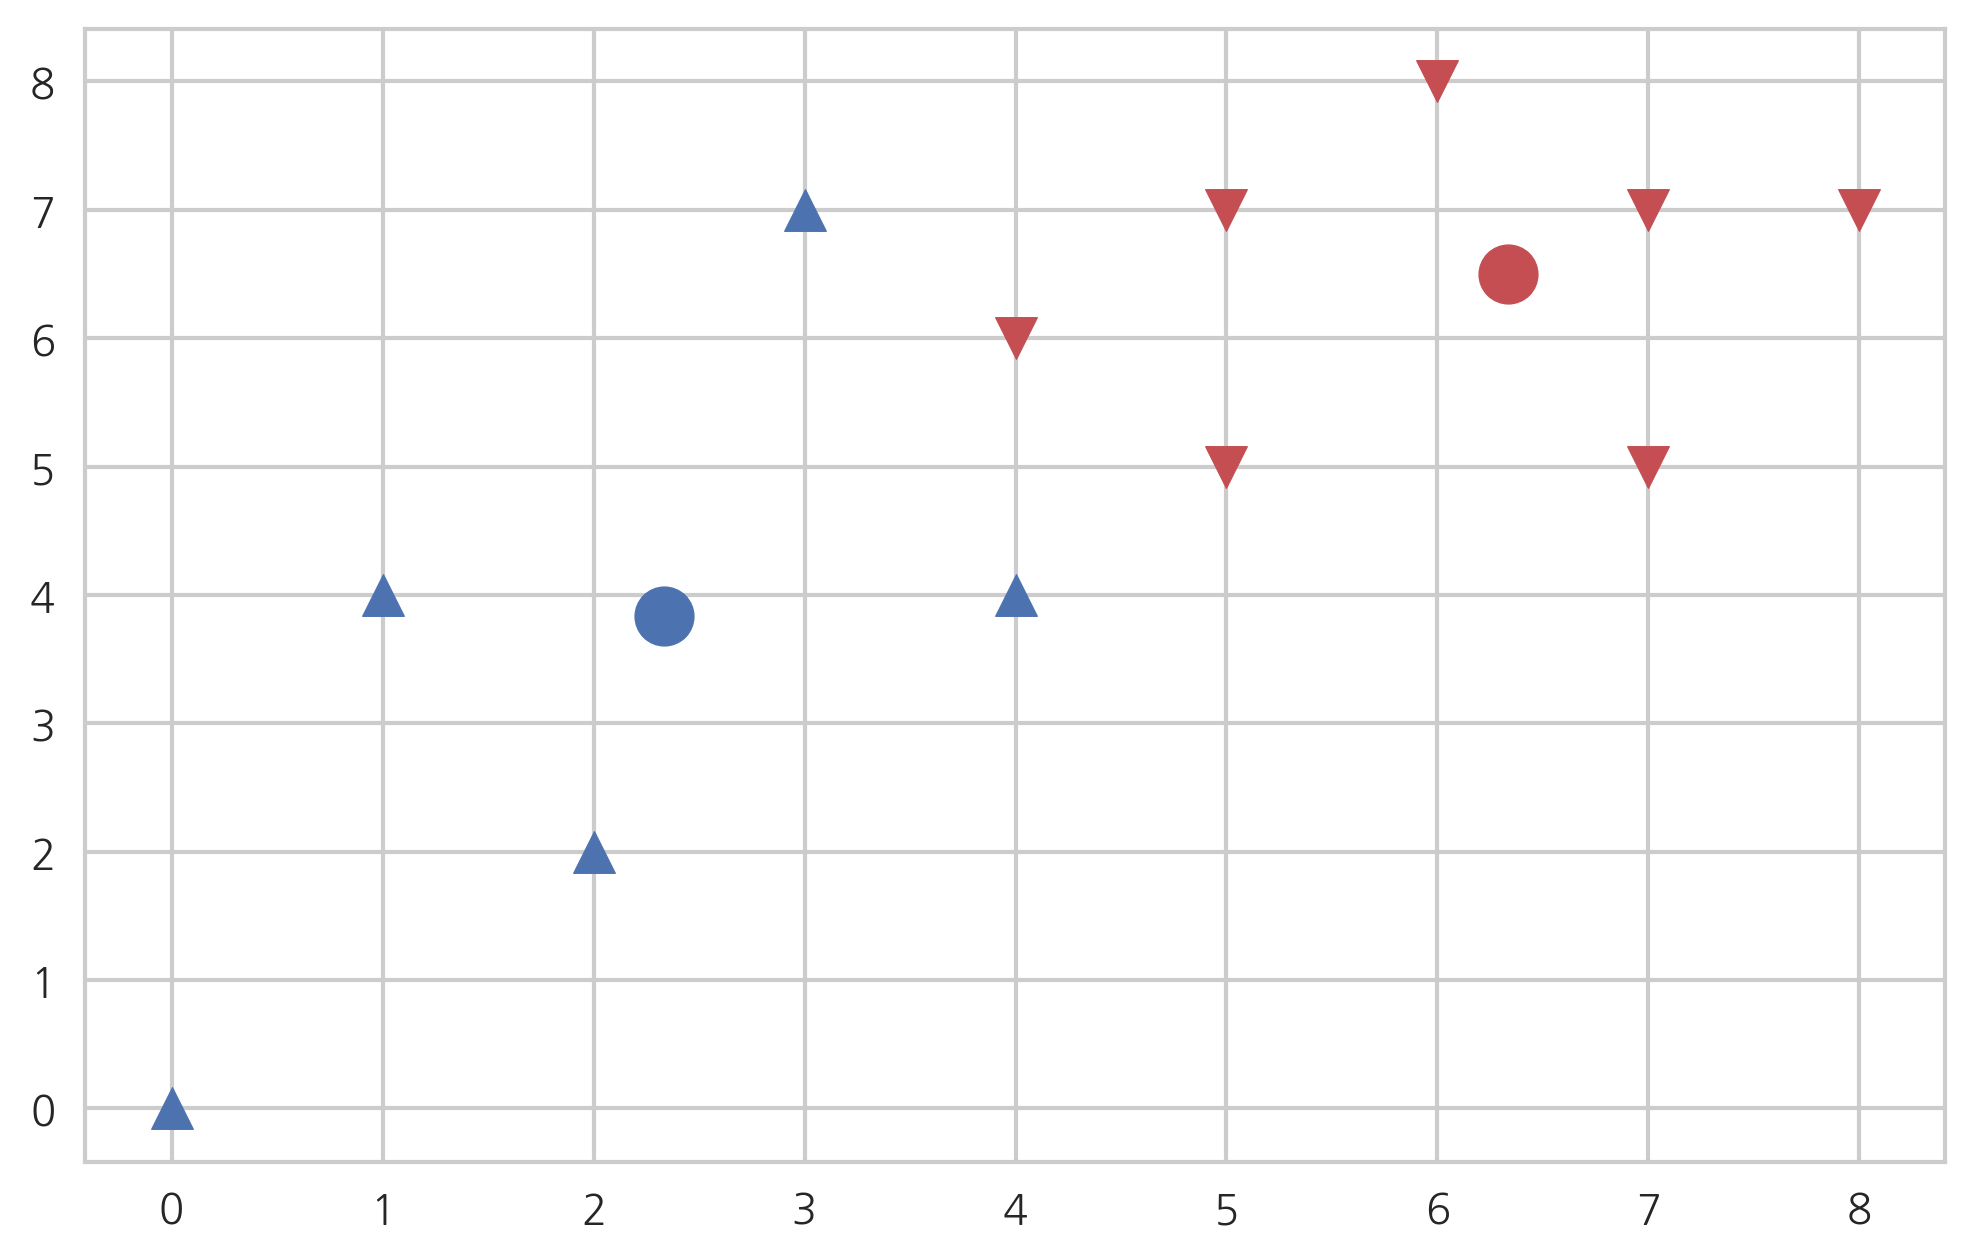

In [15]:
plot_cluster(model2, c0, c1)

In [16]:
kmeans_df(model2, c0, c1)

,x0,x1,d0,d1,c
0,7.0,5.0,1.641476,4.810290,0.0
1,5.0,7.0,1.424001,4.139914,0.0
2,7.0,7.0,0.833333,5.639641,0.0
3,4.0,4.0,3.419714,1.674979,1.0
4,4.0,6.0,2.386304,2.733537,0.0
5,1.0,4.0,5.890199,1.343710,1.0
6,0.0,0.0,9.075302,4.487637,1.0
7,2.0,2.0,6.247222,1.863390,1.0
8,8.0,7.0,1.740051,6.491447,0.0
9,6.0,8.0,1.536591,5.550275,0.0


In [17]:
calc_new_centroid(model2)

((6.0, 6.4285714285714288), (2.0, 3.3999999999999999))

### 3회차

In [18]:
model3 = KMeans(n_clusters=2, init="random", n_init=1,
               max_iter=3, random_state=1).fit(X)

In [19]:
c0, c1 = model3.cluster_centers_
c0, c1

(array([ 6.        ,  6.42857143]), array([ 2. ,  3.4]))

In [20]:
model3.score(X)

-52.280816326530697

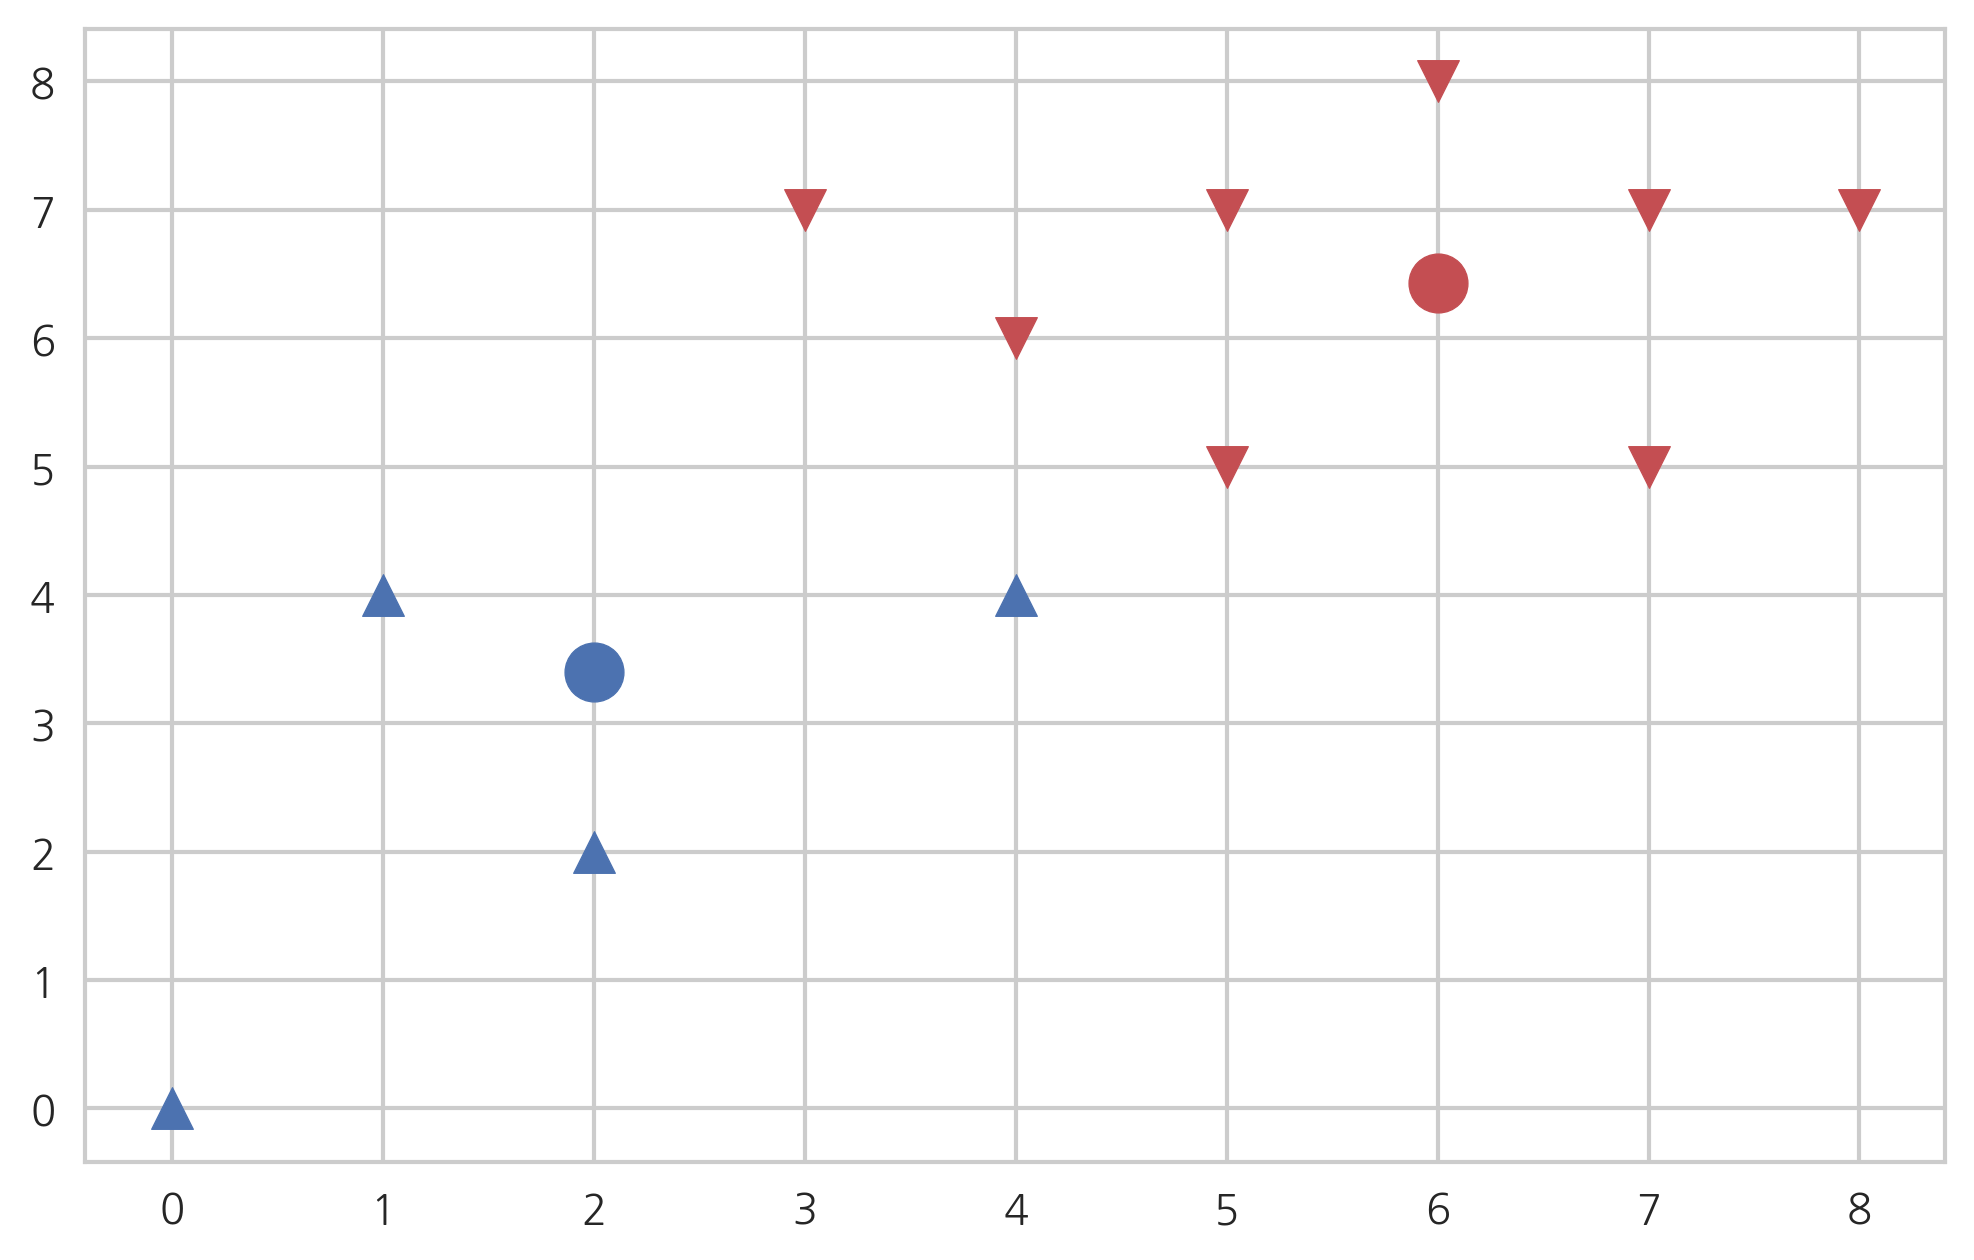

In [21]:
plot_cluster(model3, c0, c1)

In [22]:
kmeans_df(model3, c0, c1)

,x0,x1,d0,d1,c
0,7.0,5.0,1.743794,5.249762,0.0
1,5.0,7.0,1.151751,4.686150,0.0
2,7.0,7.0,1.151751,6.161169,0.0
3,4.0,4.0,3.146102,2.088061,1.0
4,4.0,6.0,2.045403,3.280244,0.0
5,1.0,4.0,5.558593,1.166190,1.0
6,0.0,0.0,8.793551,3.944617,1.0
7,2.0,2.0,5.967600,1.400000,1.0
8,8.0,7.0,2.080031,6.997142,0.0
9,6.0,8.0,1.571429,6.095900,0.0


In [23]:
calc_new_centroid(model3)

((5.625, 6.5), (1.75, 2.5))

### 4회차

In [24]:
model4 = KMeans(n_clusters=2, init="random", n_init=1,
                max_iter=4, random_state=1).fit(X)

In [25]:
c0, c1 = model4.cluster_centers_
c0, c1

(array([ 5.625,  6.5  ]), array([ 1.75,  2.5 ]))

In [26]:
model4.score(X)

-47.625

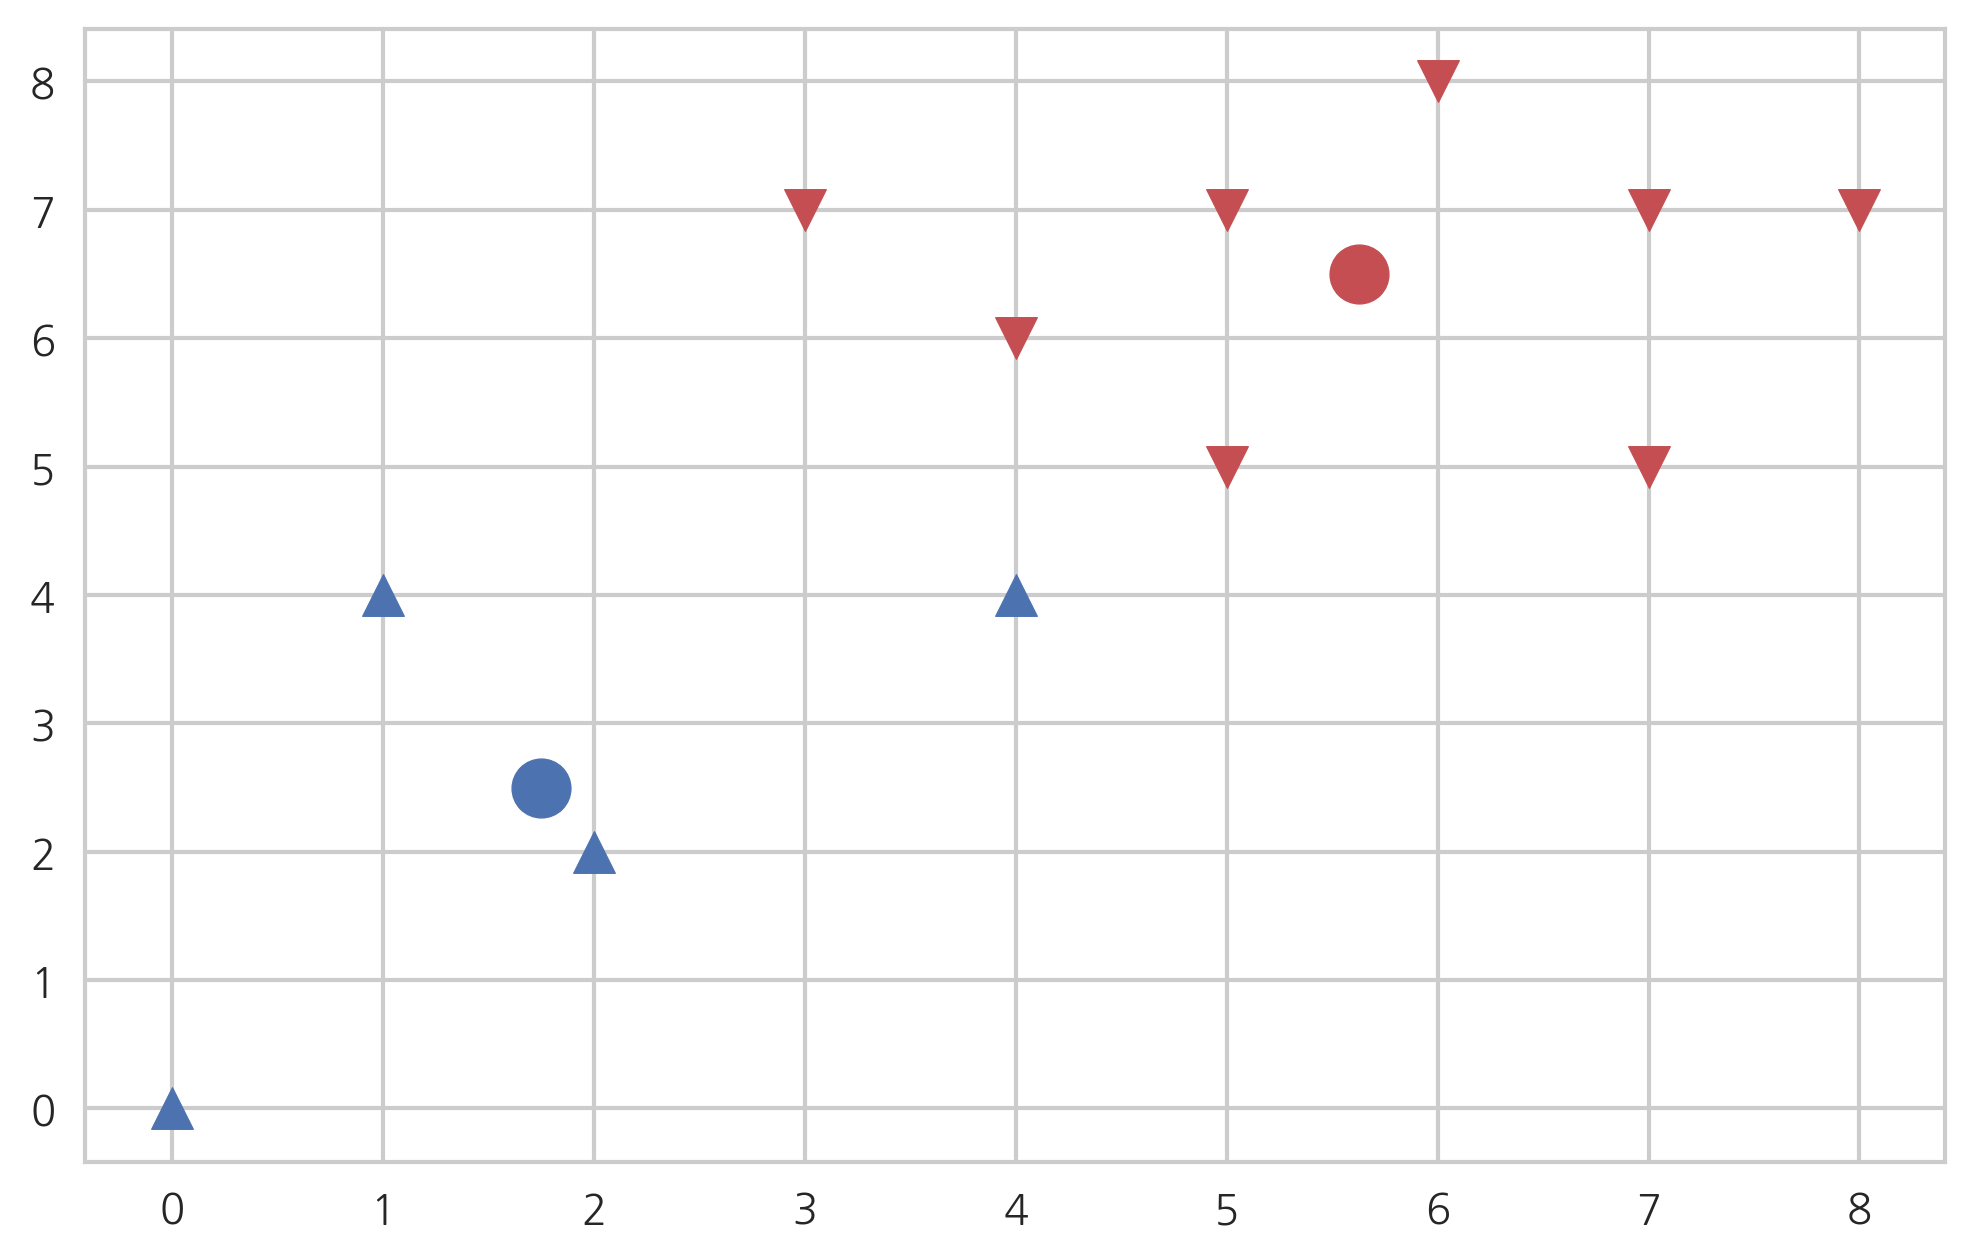

In [27]:
plot_cluster(model4, c0, c1)

In [28]:
kmeans_df(model4, c0, c1)

,x0,x1,d0,d1,c
0,7.0,5.0,2.034853,5.814852,0.0
1,5.0,7.0,0.800391,5.550901,0.0
2,7.0,7.0,1.463087,6.914658,0.0
3,4.0,4.0,2.981715,2.704163,1.0
4,4.0,6.0,1.700184,4.160829,0.0
5,1.0,4.0,5.257435,1.677051,1.0
6,0.0,0.0,8.595966,3.051639,1.0
7,2.0,2.0,5.778462,0.559017,1.0
8,8.0,7.0,2.427061,7.701461,0.0
9,6.0,8.0,1.546165,6.950719,0.0


In [29]:
calc_new_centroid(model4)

((5.625, 6.5), (1.75, 2.5))

### 5회차

In [30]:
model5 = KMeans(n_clusters=2, init="random", n_init=1,
                max_iter=5, random_state=1).fit(X)

In [31]:
c0, c1 = model5.cluster_centers_
c0, c1

(array([ 5.625,  6.5  ]), array([ 1.75,  2.5 ]))

In [32]:
model5.score(X)

-47.625

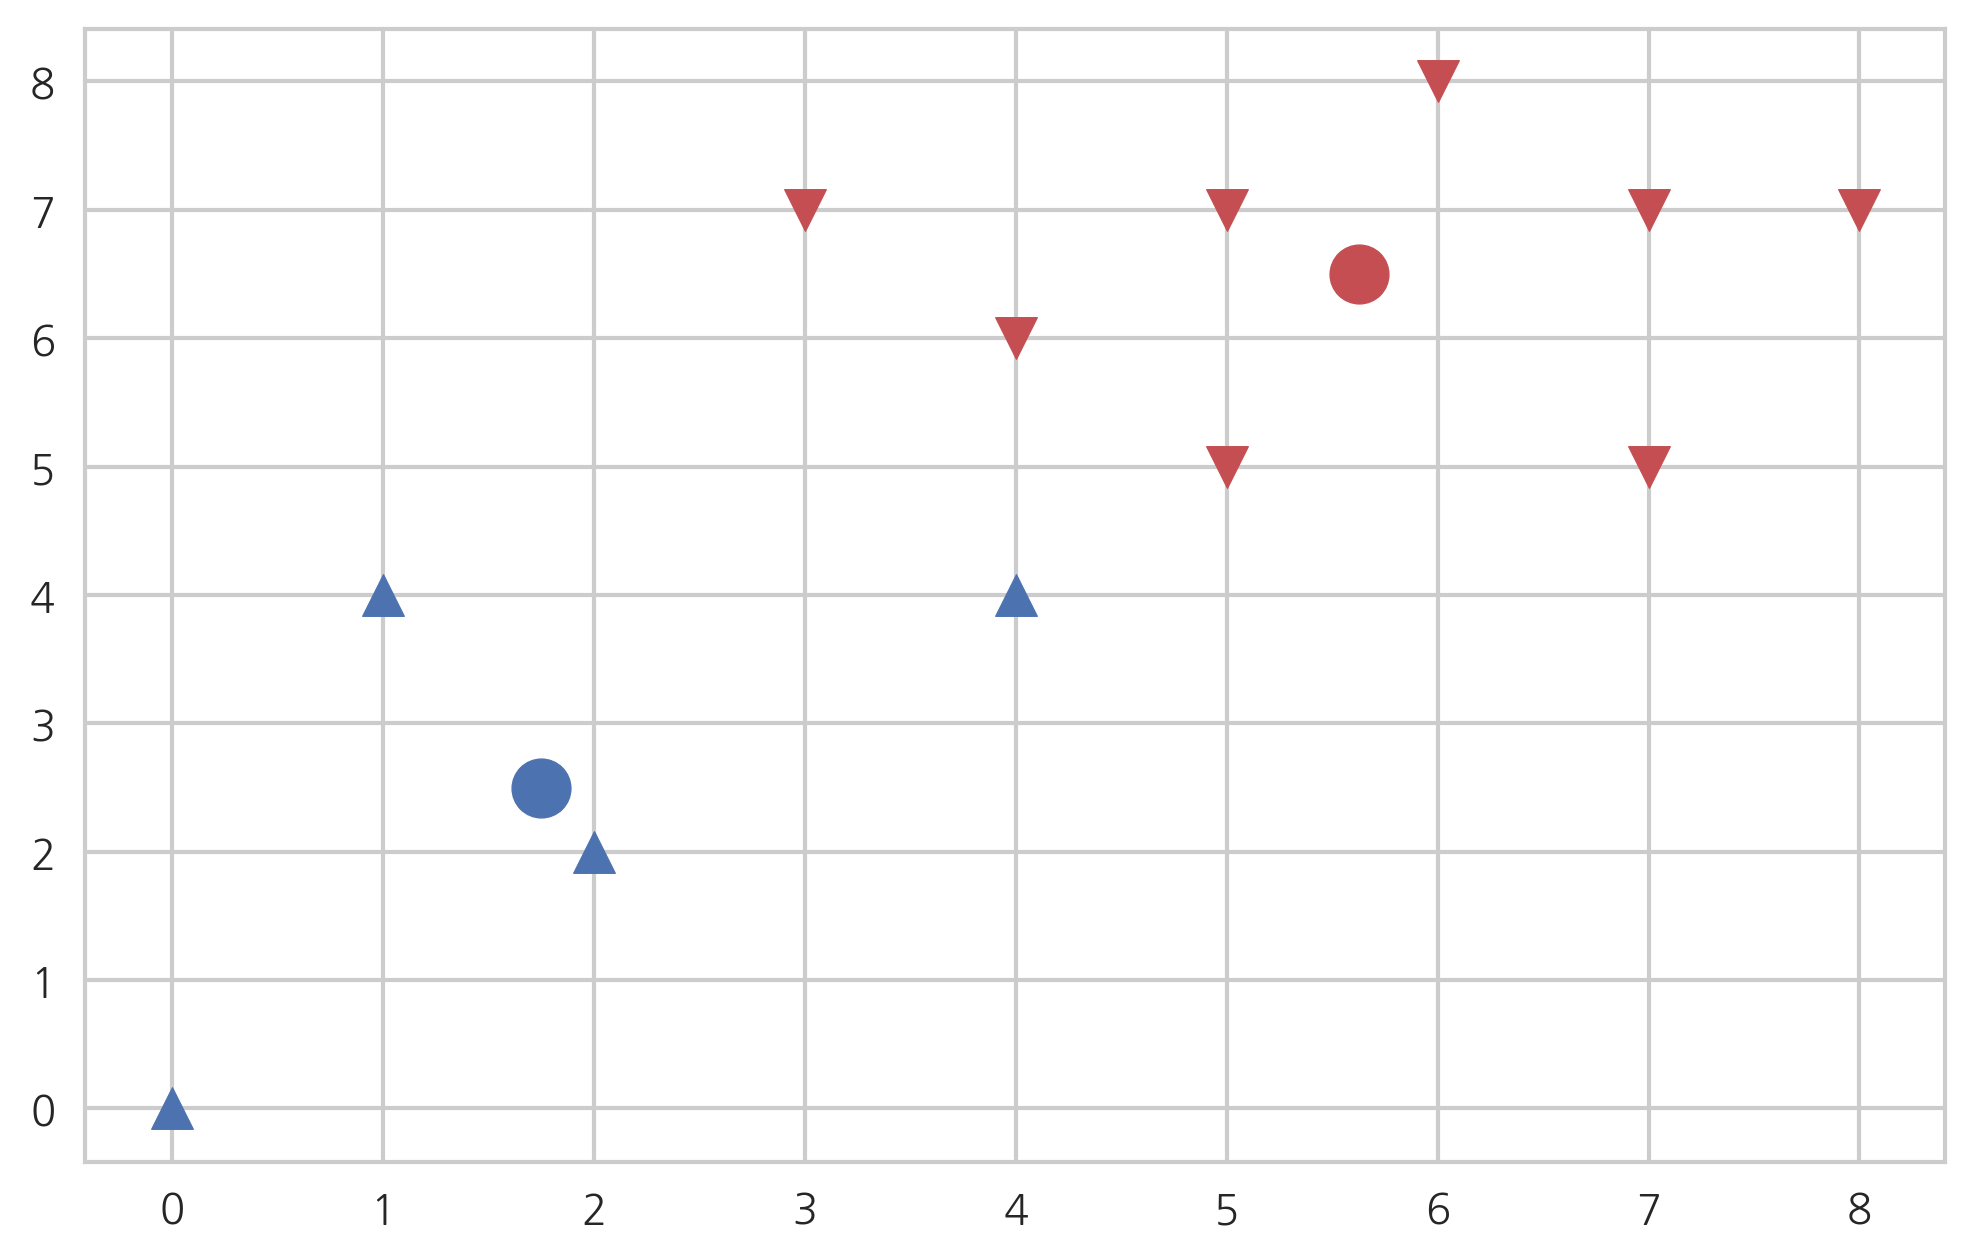

In [33]:
plot_cluster(model5, c0, c1)

In [34]:
kmeans_df(model5, c0, c1)

,x0,x1,d0,d1,c
0,7.0,5.0,2.034853,5.814852,0.0
1,5.0,7.0,0.800391,5.550901,0.0
2,7.0,7.0,1.463087,6.914658,0.0
3,4.0,4.0,2.981715,2.704163,1.0
4,4.0,6.0,1.700184,4.160829,0.0
5,1.0,4.0,5.257435,1.677051,1.0
6,0.0,0.0,8.595966,3.051639,1.0
7,2.0,2.0,5.778462,0.559017,1.0
8,8.0,7.0,2.427061,7.701461,0.0
9,6.0,8.0,1.546165,6.950719,0.0


In [35]:
calc_new_centroid(model5)

((5.625, 6.5), (1.75, 2.5))

## K-Means++

K-Means++ 알고리즘은 최초의 중심값을 설정하기 위한 알고리즘이다.


1. 중심값을 저장할 집합 $M$ 준비
2. 일단 하나의 중심 $\mu_0$를 랜덤하게 선택하여 $M$에 넣는다.
3. $M$에 속하지 않는 모든 샘플 $x_i$에 대해 거리 $d(M, x_i)$를 계산. $d(M, x_i)$는 $M$안의 모든 샘플 $\mu_k$에 대해  $d(\mu_k, x_i)$를 계산하여 가장 작은 값 선택
4. $d(M, x_i)$에 비례한 확률로 다음 중심 $\mu$를 선택.
5. $K$개의 중심을 선택할 때까지 반복
6. K-Means 알고리즘 사용

### 예: Iris

In [36]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target


def plot_iris_cluster(model):
    fig = plt.figure()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    model.fit(X)
    labels = model.labels_
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(
        np.float), s=100, cmap=mpl.cm.jet)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    plt.show()

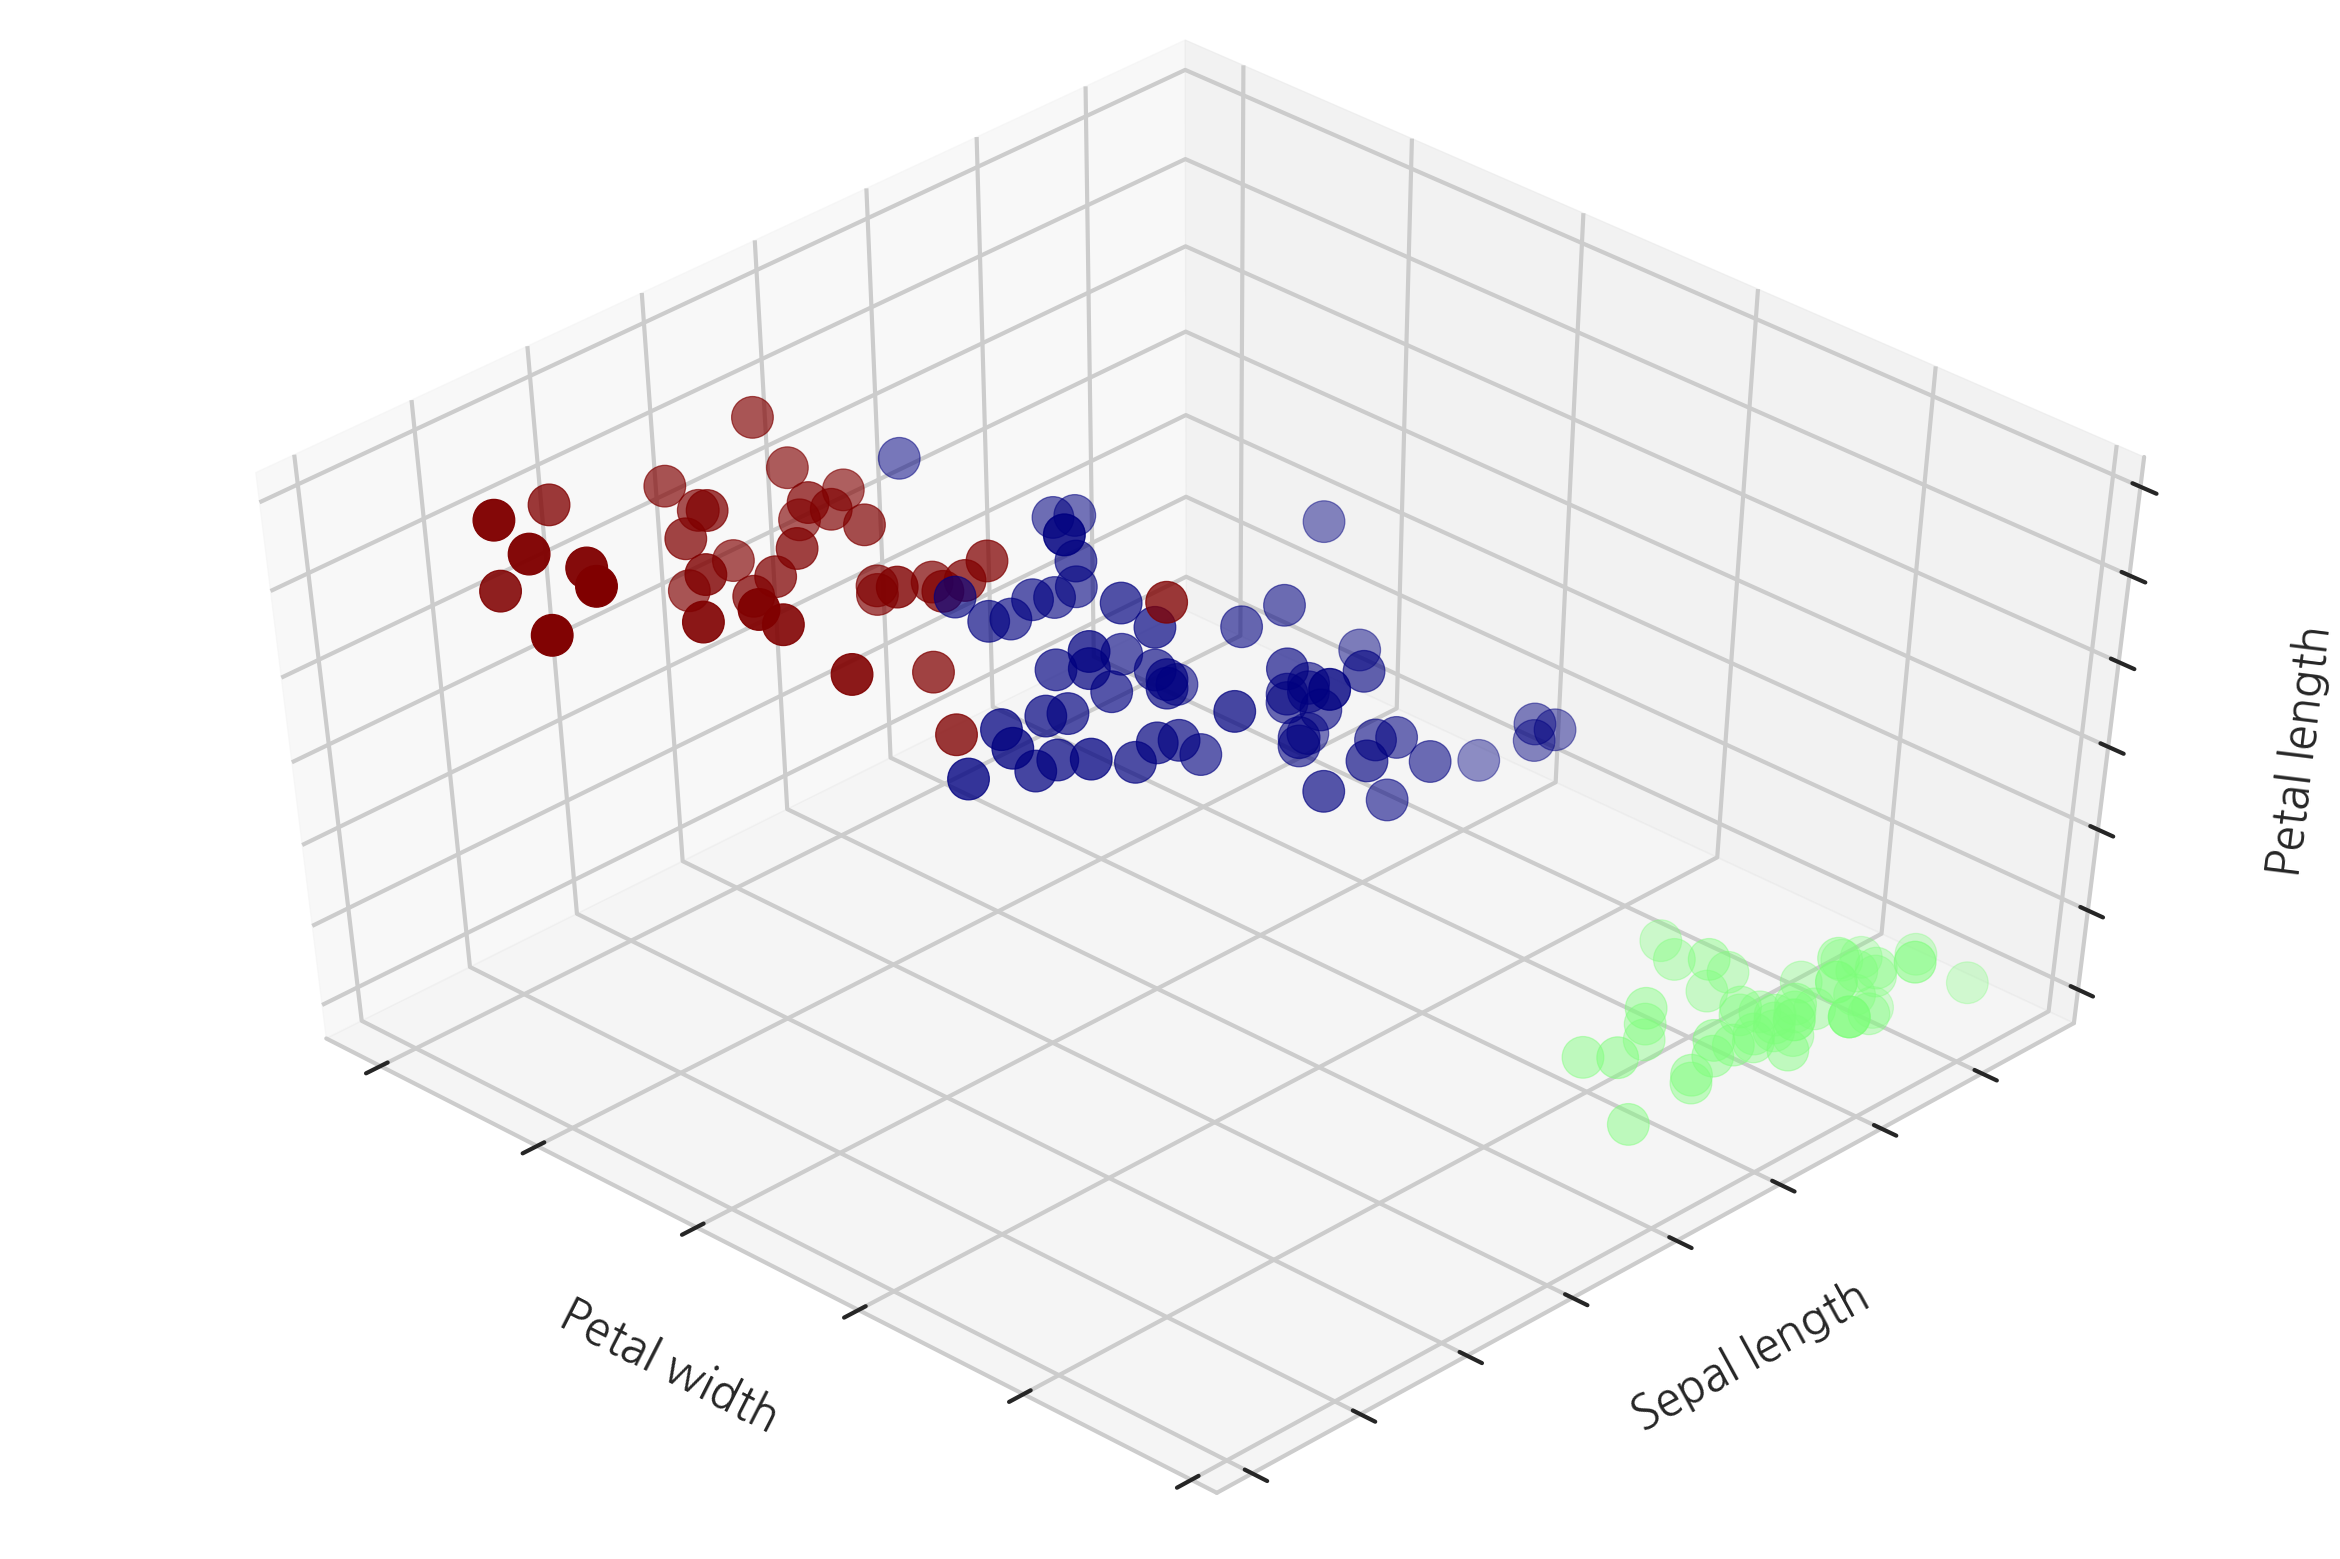

In [37]:
model3 = KMeans(n_clusters=3)
plot_iris_cluster(model3)

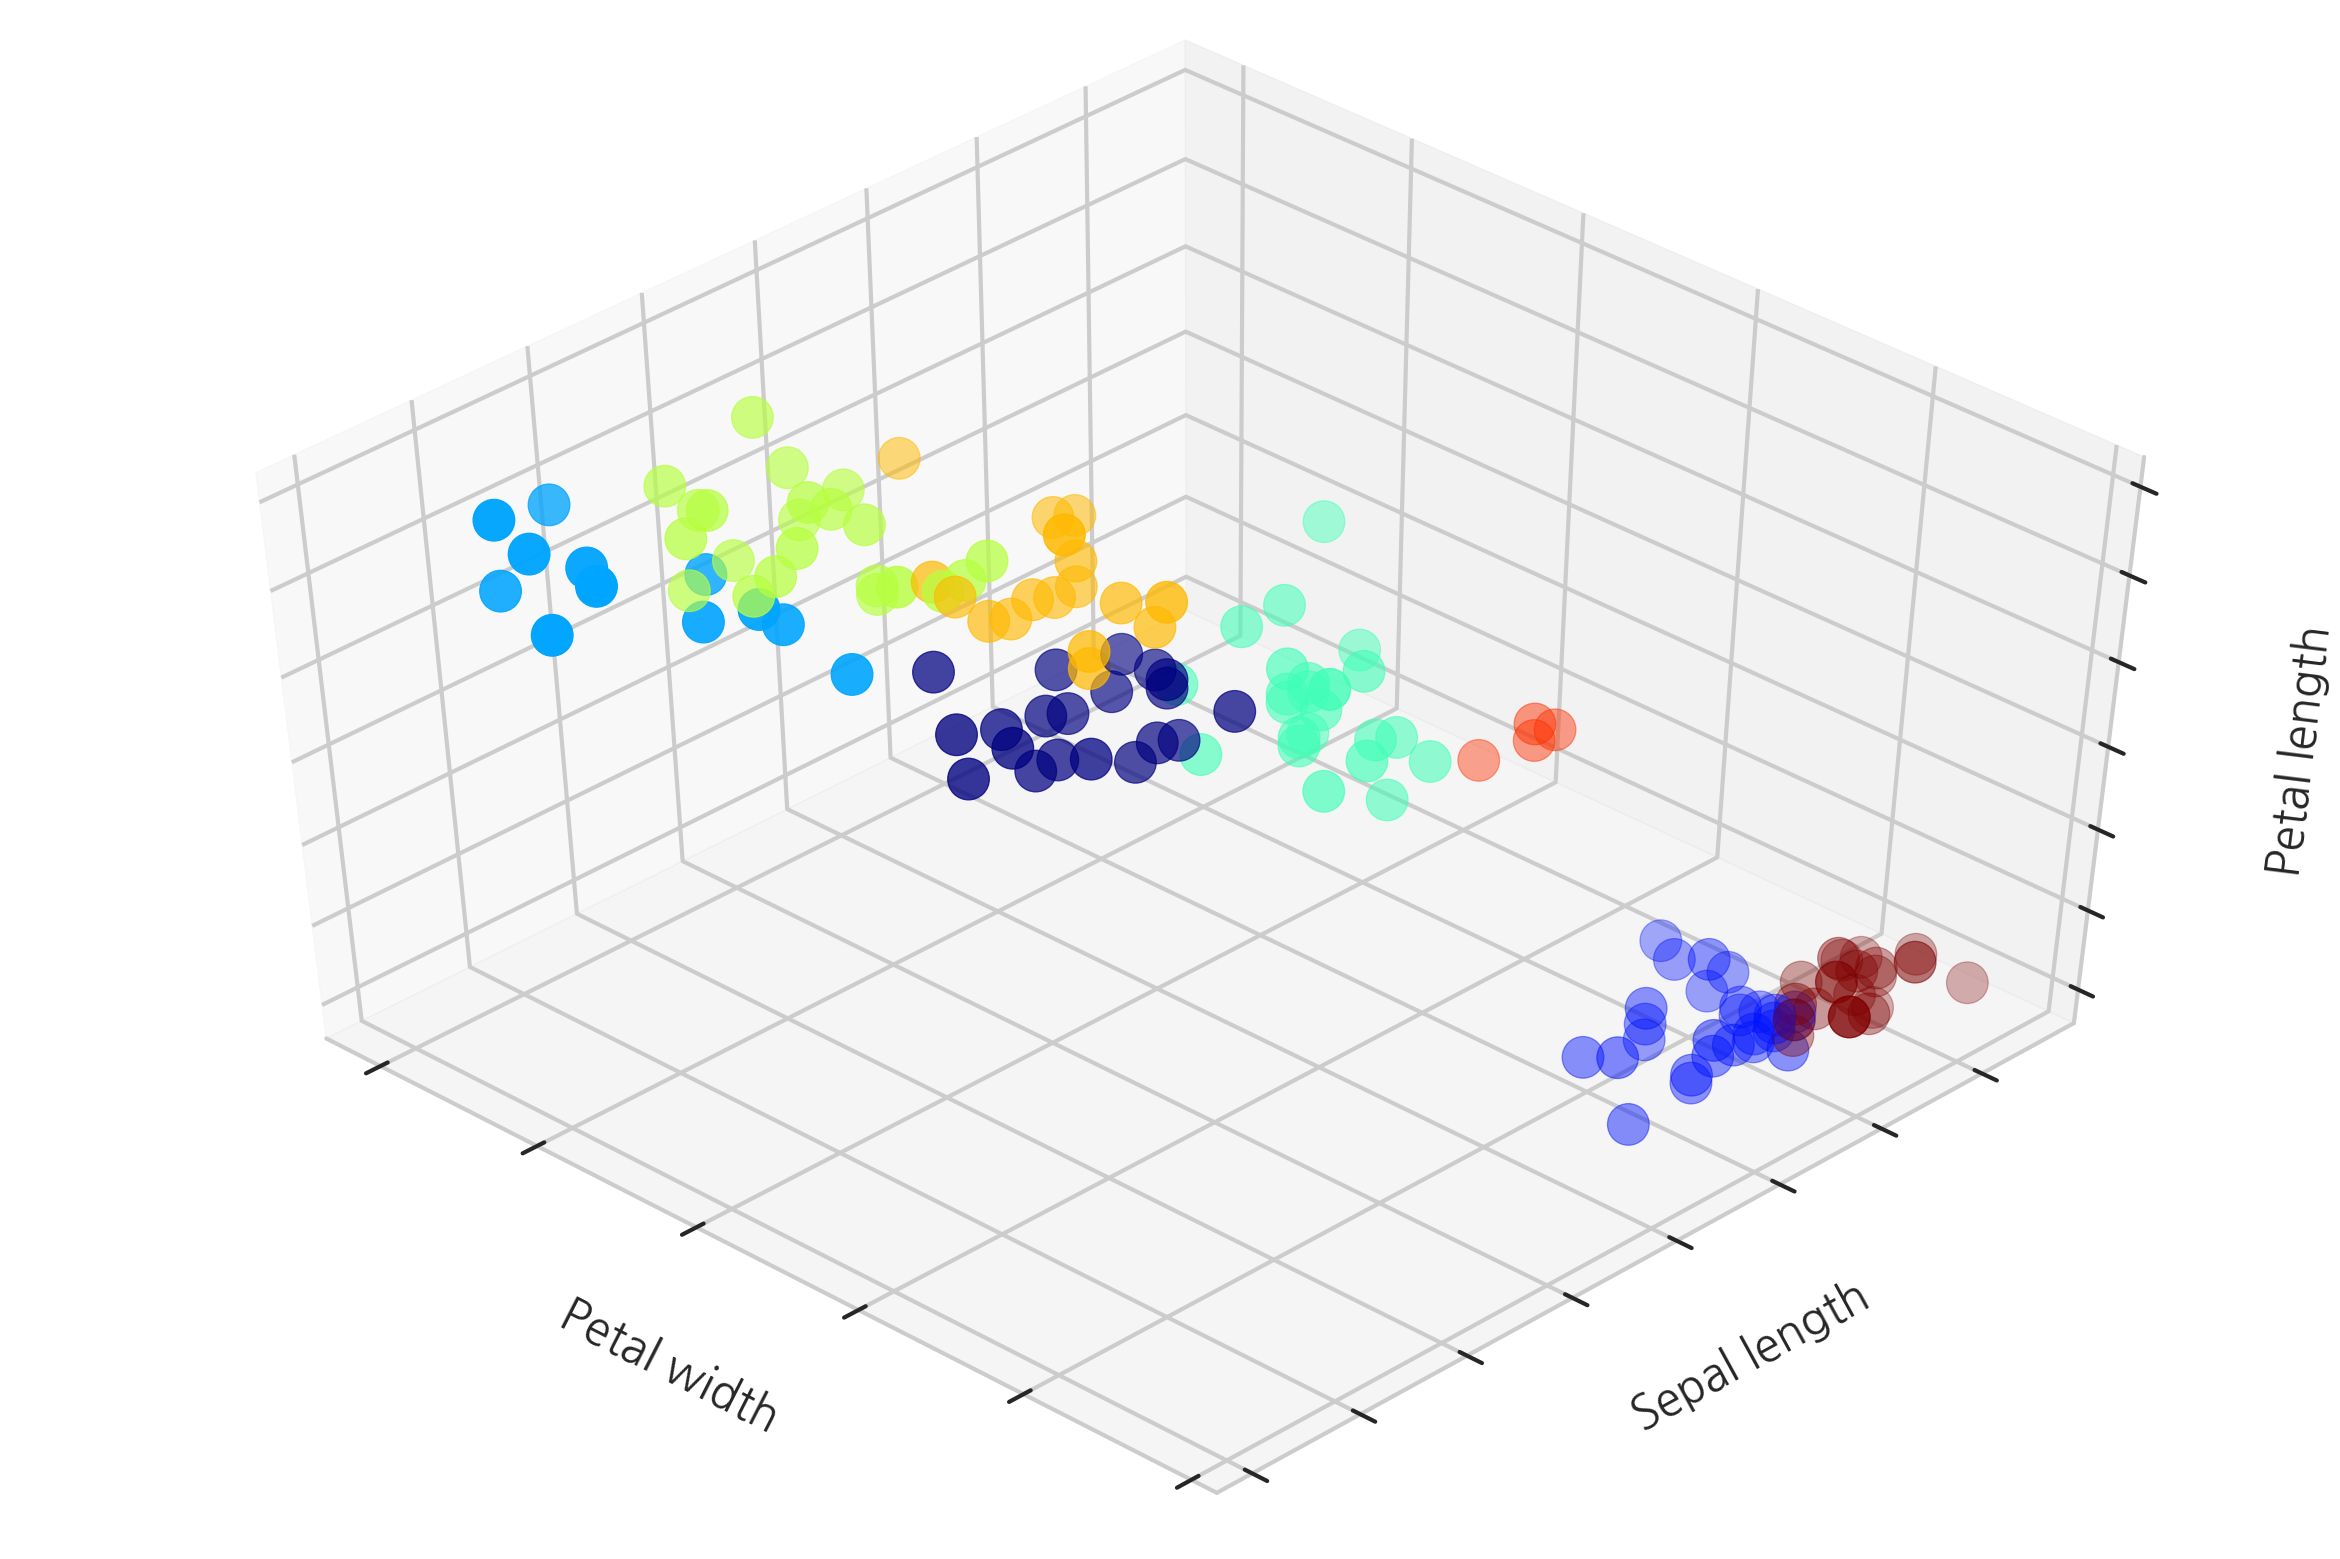

In [38]:
model8 = KMeans(n_clusters=8)
plot_iris_cluster(model8)

### 예: Digit Image

In [39]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

digits = load_digits()
data = scale(digits.data)

def show_digits(images, labels):
    f = plt.figure(figsize=(10,2))
    plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.table
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1

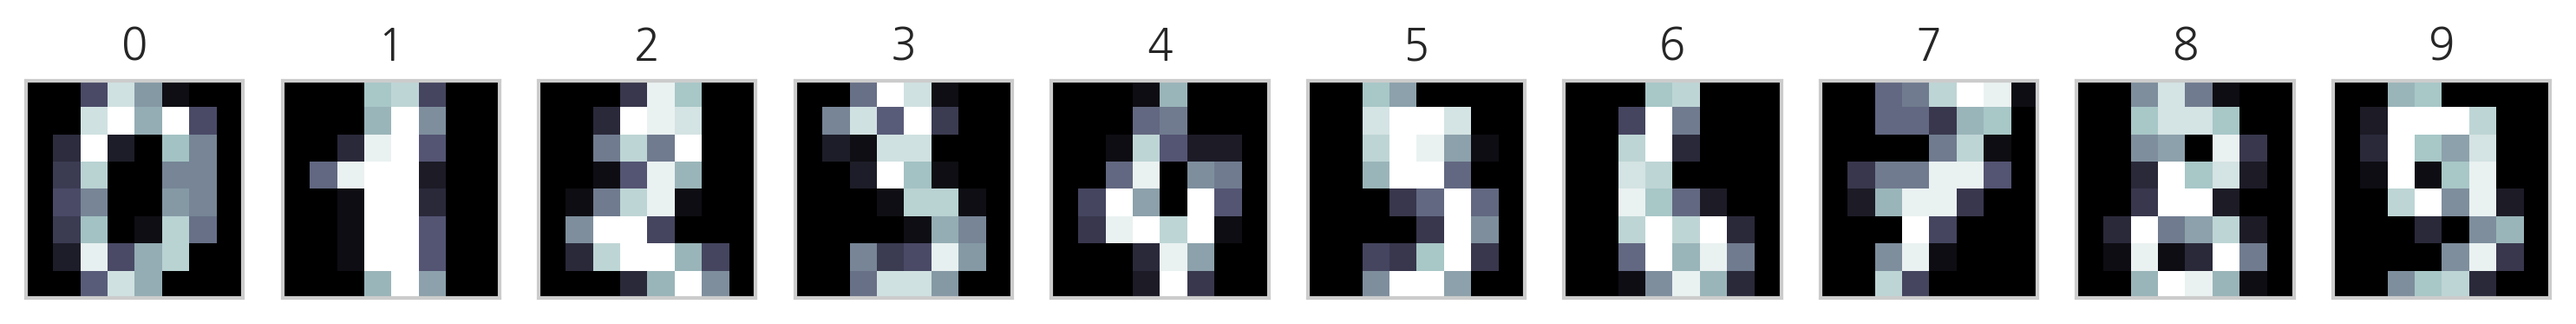

In [40]:
show_digits(digits.images, range(10))

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, images_train, images_test = \
    train_test_split(data, digits.target, digits.images,
                     test_size=0.25, random_state=42)

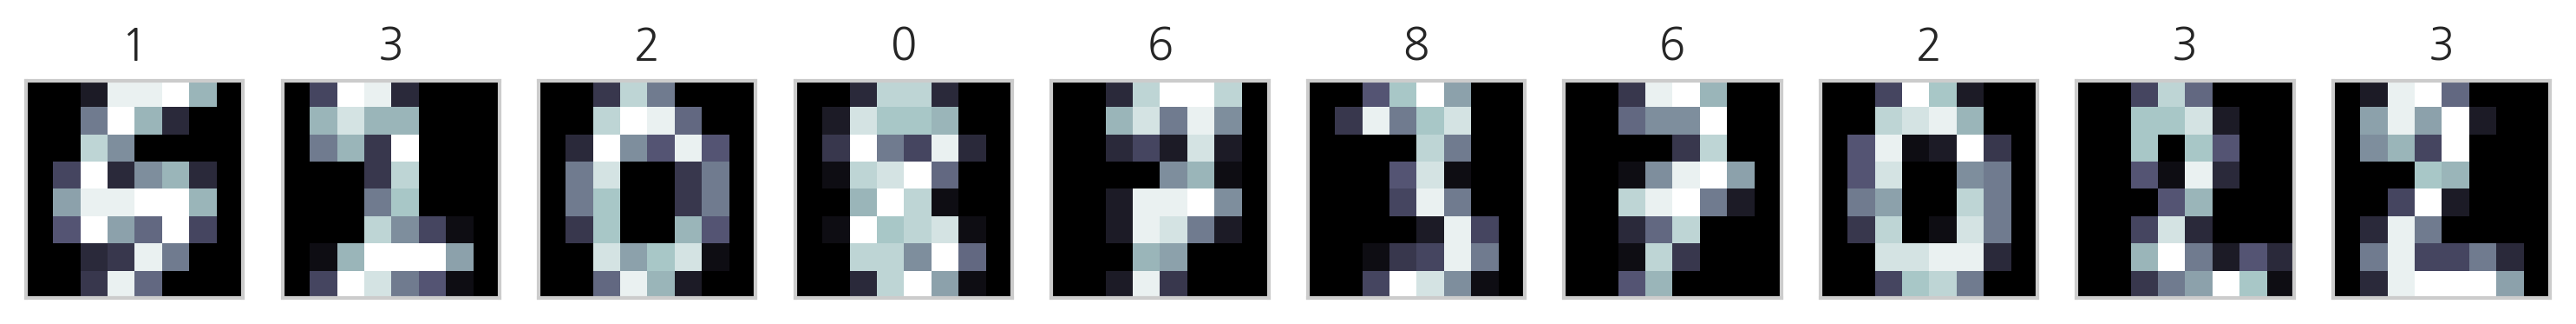

In [42]:
model = KMeans(init="k-means++", n_clusters=10, random_state=42)
model.fit(X_train)
show_digits(images_train, model.labels_)

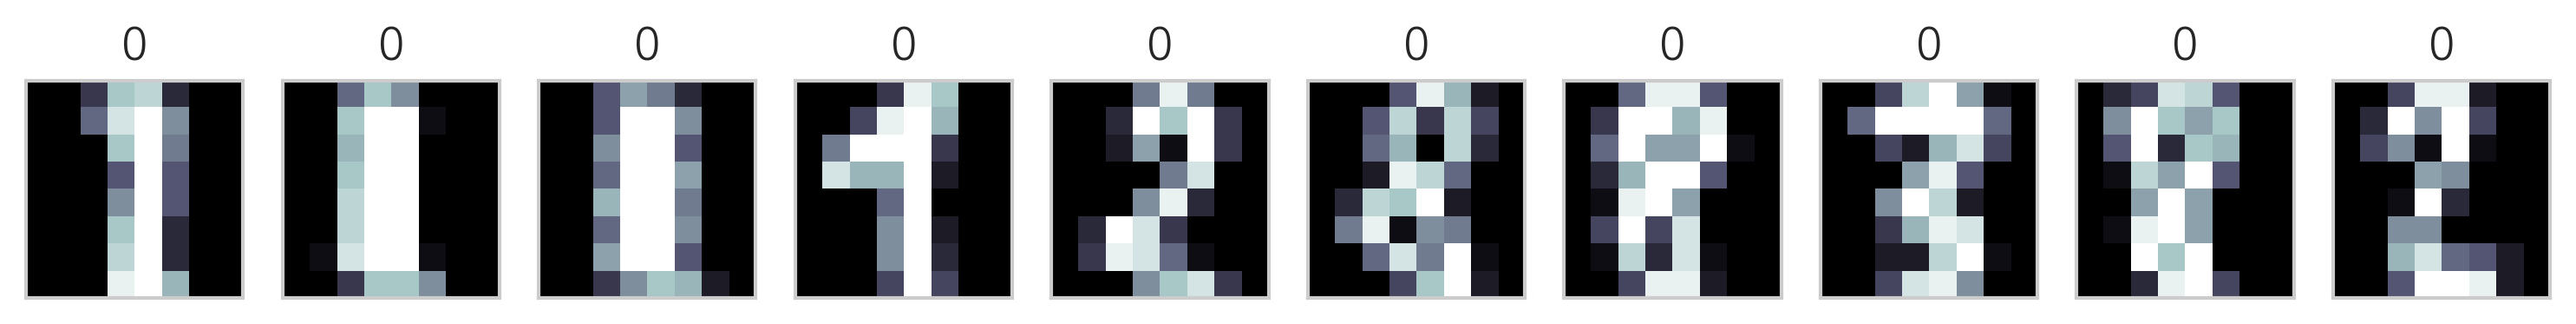

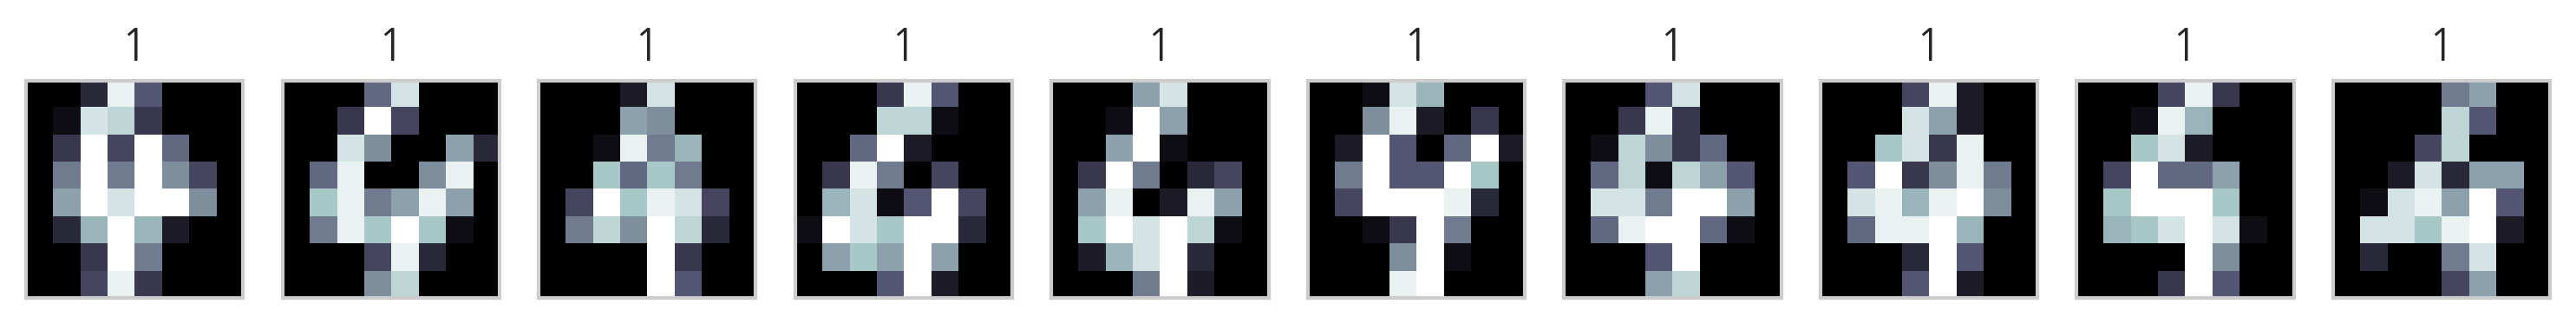

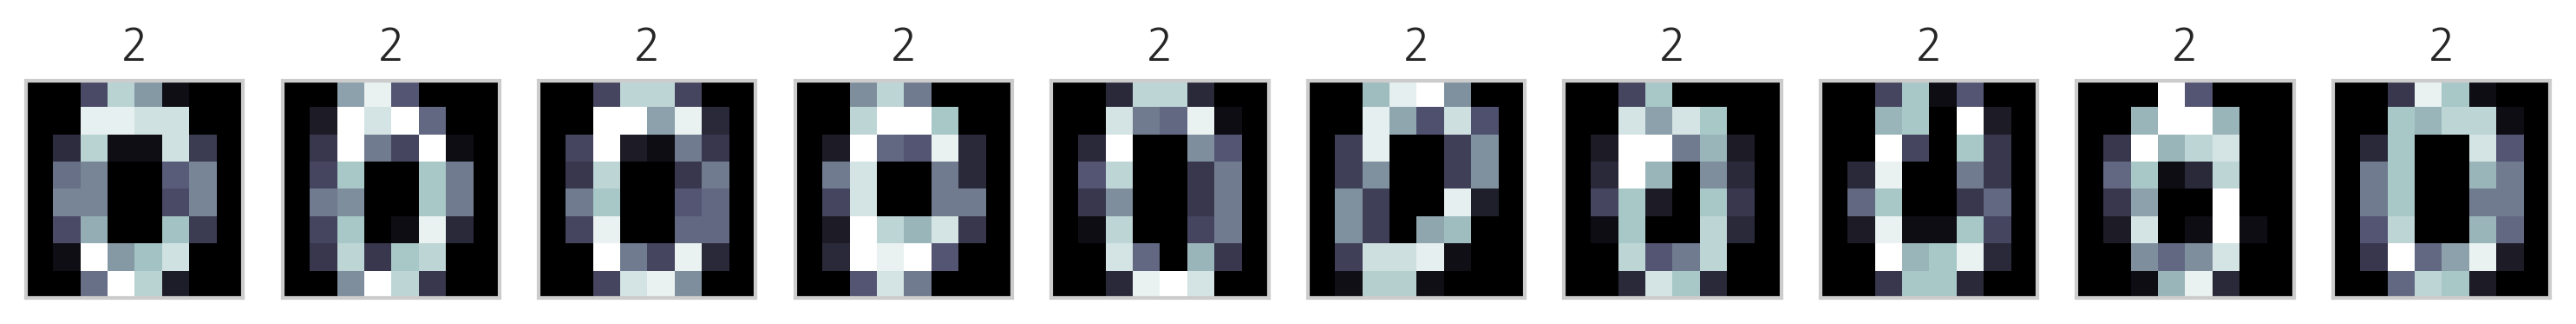

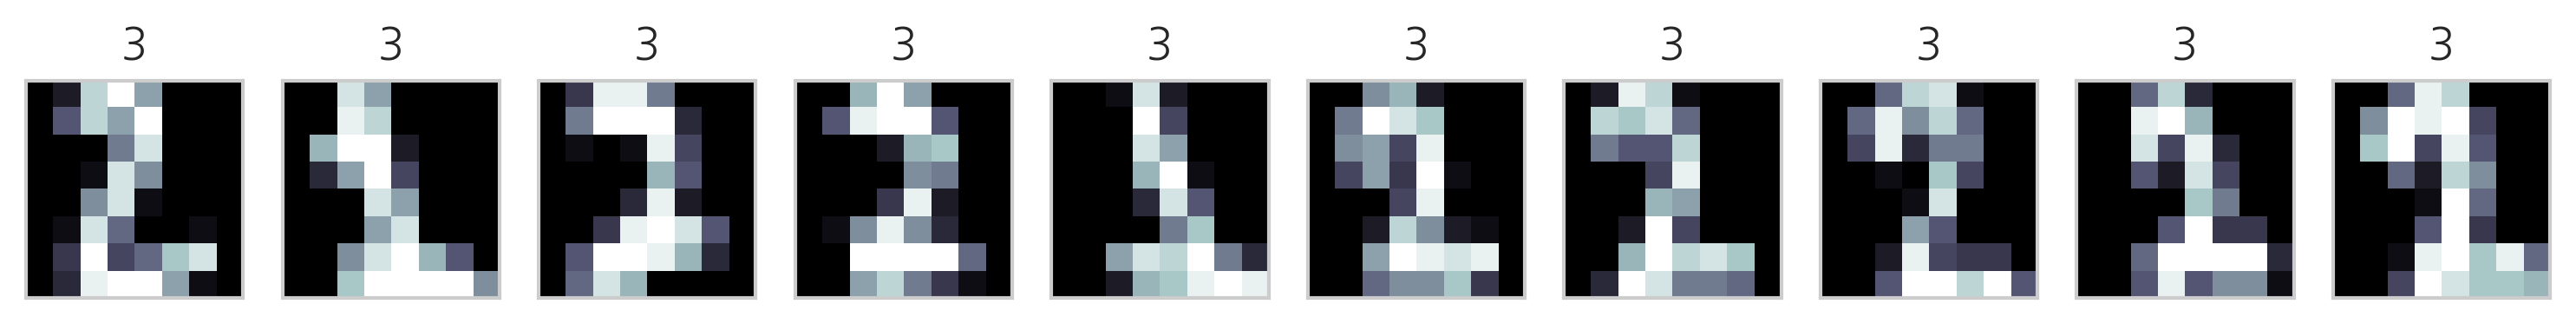

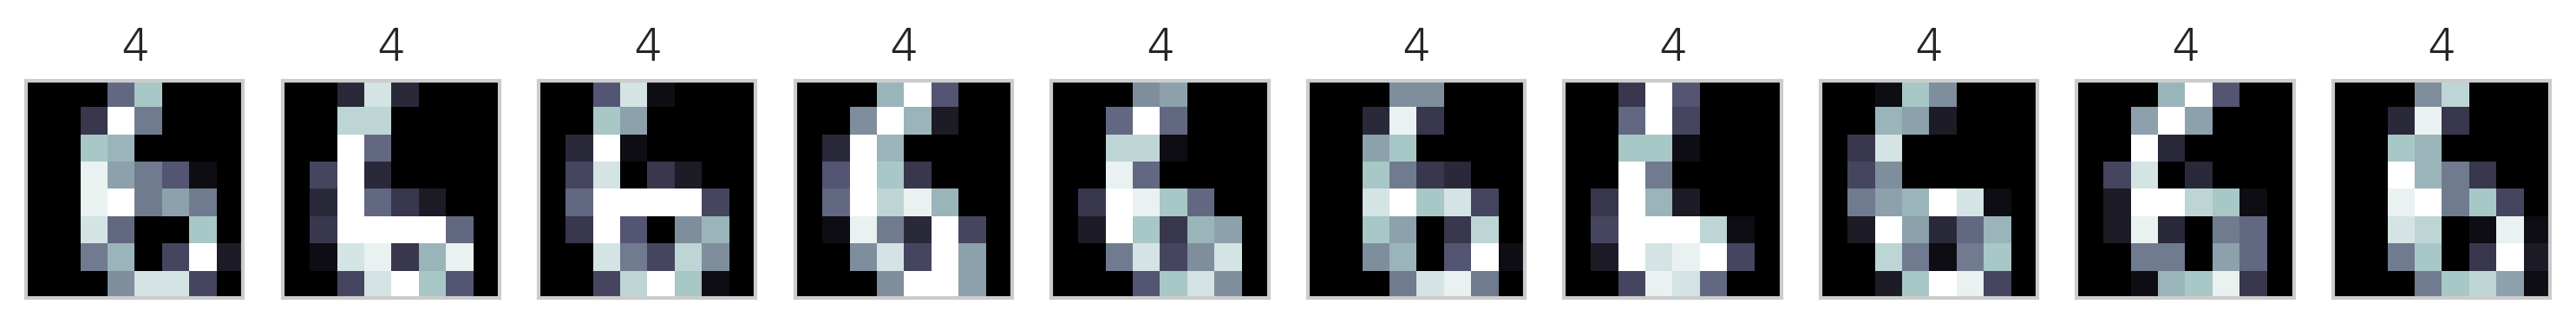

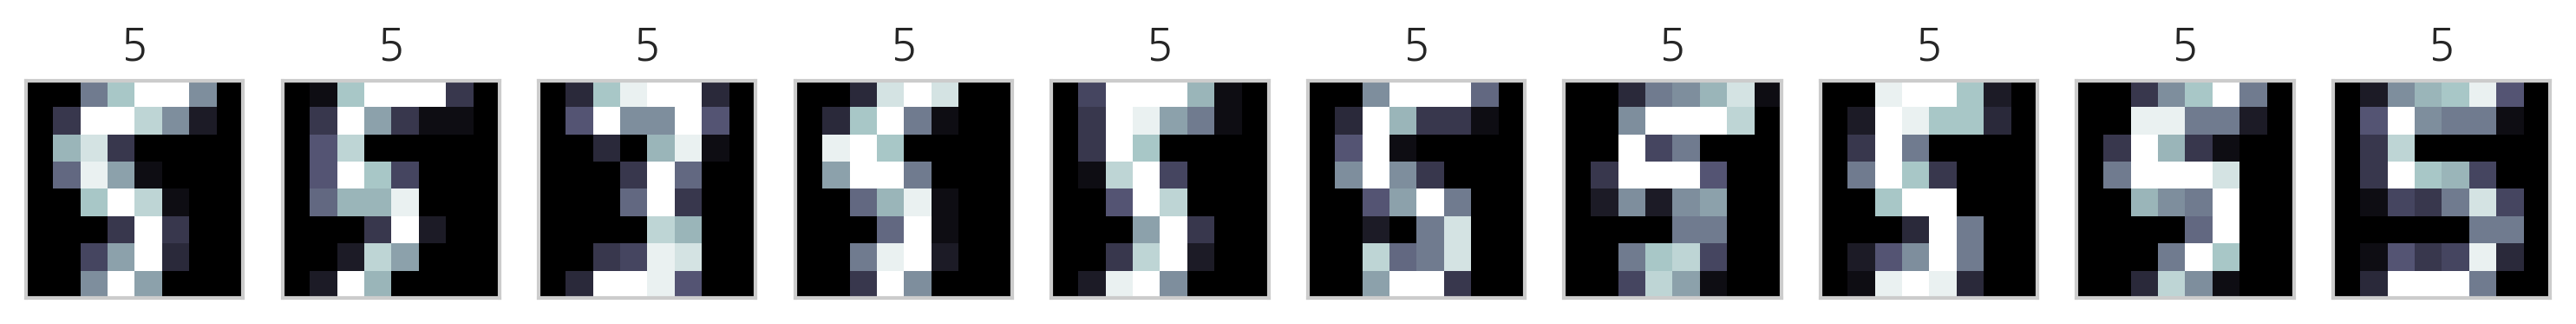

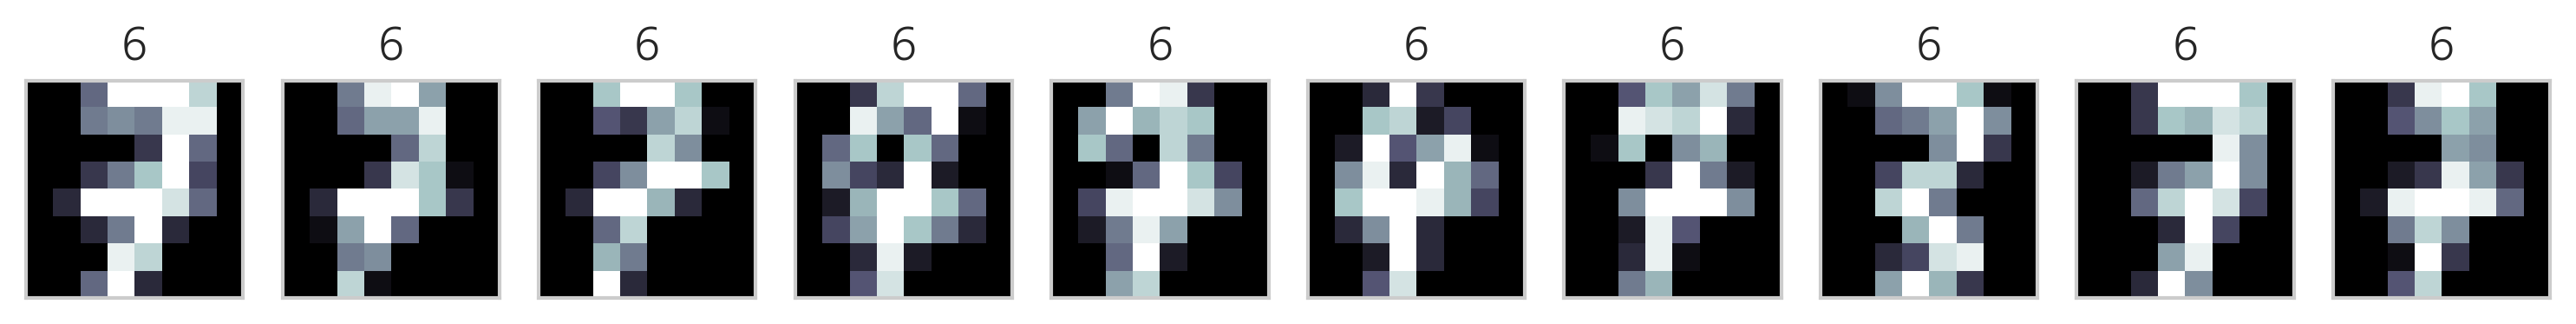

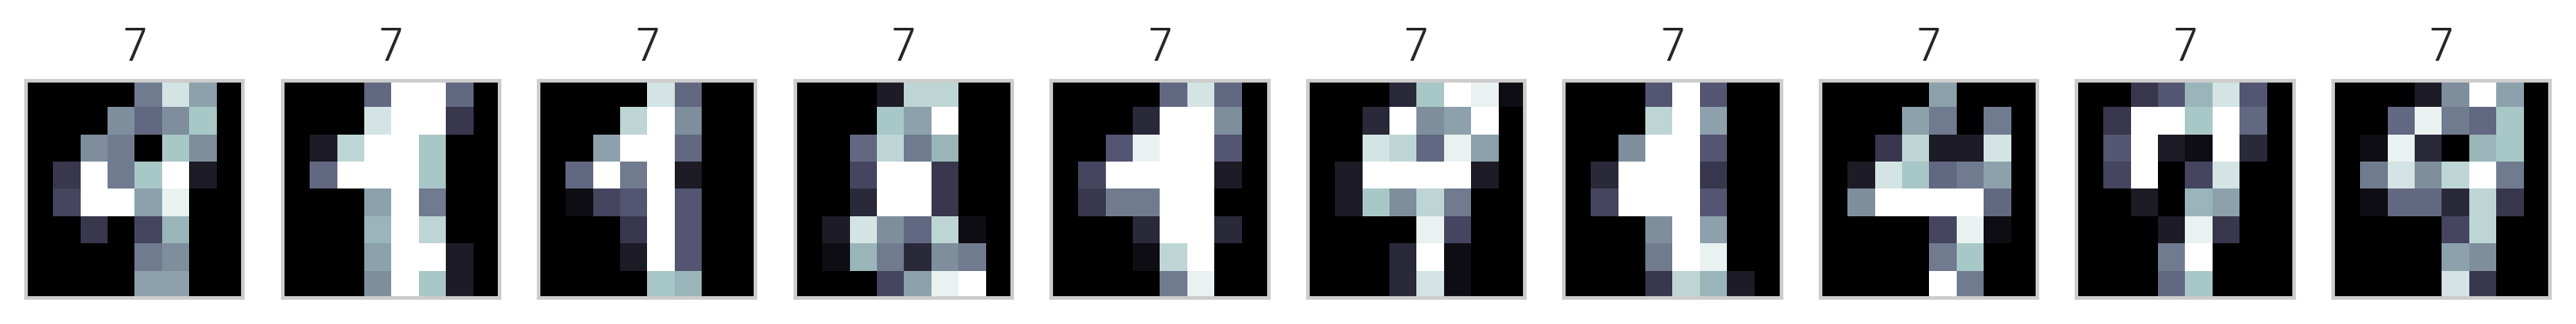

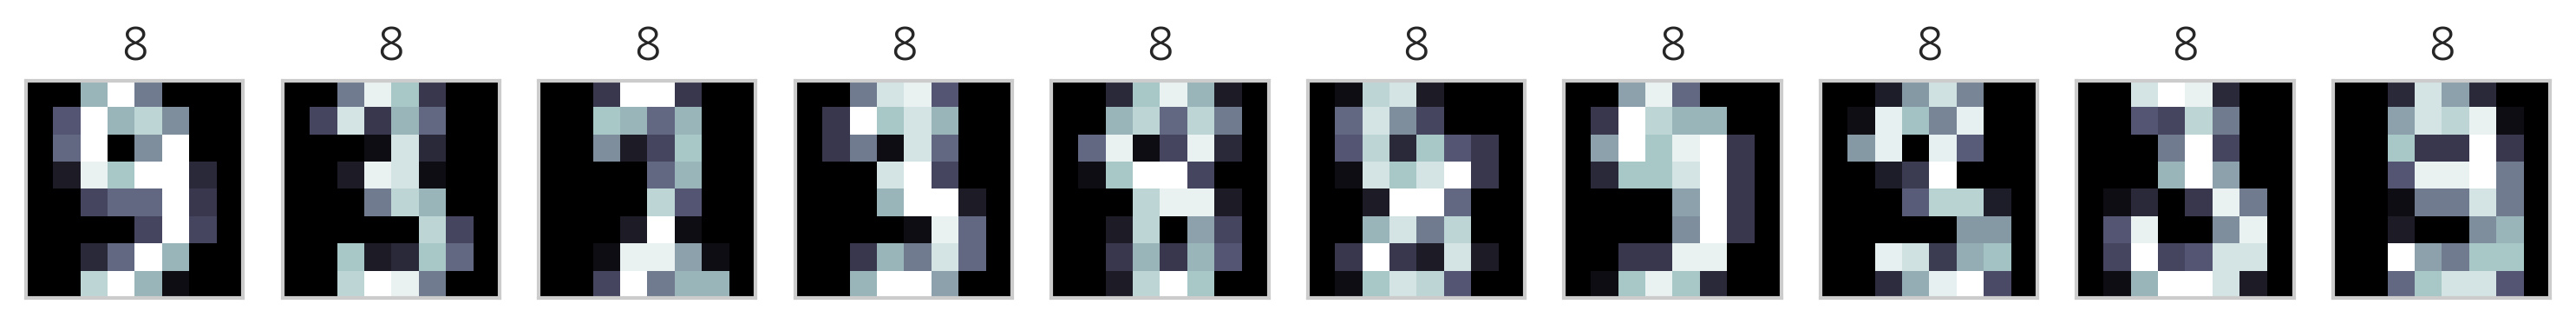

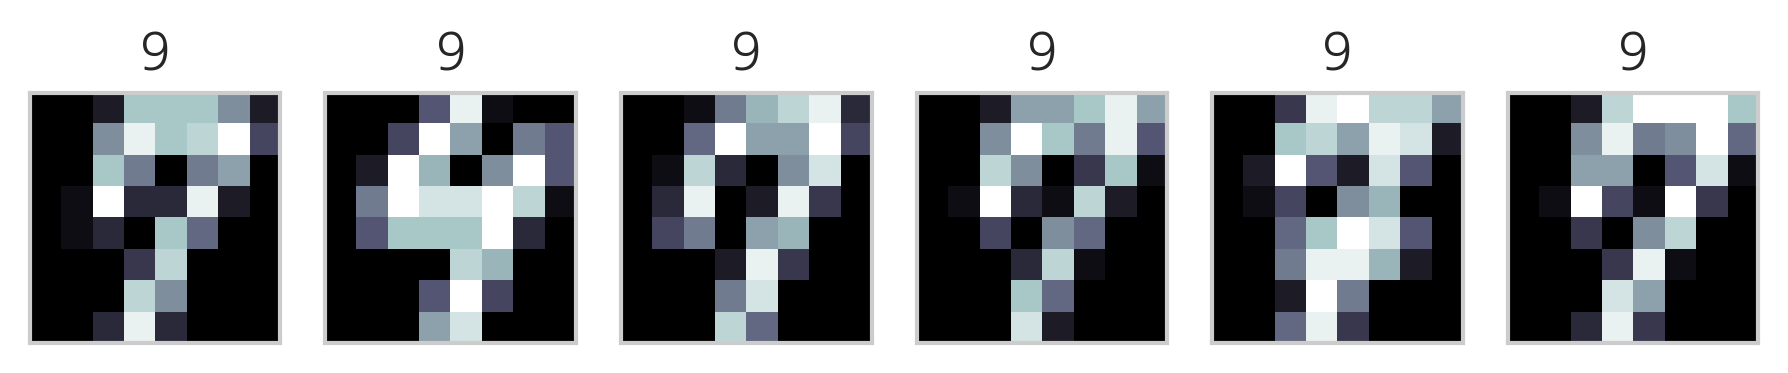

In [43]:
y_pred = model.predict(X_test)

def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)

for i in range(10):
    show_cluster(images_test, y_pred, i)

In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [20,  0,  0,  7,  0,  0,  0, 10,  0,  0],
       [ 5,  0,  0, 31,  0,  0,  0,  1,  1,  0],
       [ 1,  0,  0,  1,  0,  1,  4,  0, 39,  0],
       [ 1, 50,  0,  0,  0,  0,  1,  2,  0,  1],
       [ 1,  0,  0,  0,  1, 41,  0,  0, 16,  0],
       [ 0,  0,  1,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  1,  0,  5],
       [21,  0,  0,  0,  0,  3,  1,  2, 11,  0],
       [ 0,  0,  0,  0,  0,  2,  3,  3, 40,  0]])

## 클러스터링 성능 기준

### 정확한 답(클러스터의 갯수 및 소속)을 알고 있는 경우

$$
\begin{array}{c|cccc|c}
{{} \atop X}\!\diagdown\!^Y &
Y_1&
Y_2&
\ldots&
Y_s&
\text{Sums}
\\
\hline
X_1&
n_{11}&
n_{12}&
\ldots&
n_{1s}&
a_1
\\
X_2&
n_{21}&
n_{22}&
\ldots&
n_{2s}&
a_2
\\
\vdots&
\vdots&
\vdots&
\ddots&
\vdots&
\vdots
\\
X_r&
n_{r1}&
n_{r2}&
\ldots&
n_{rs}&
a_r
\\
\hline
\text{Sums}&
b_1&
b_2&
\ldots&
b_s&
\end{array}
$$


#### Adjusted Rand index

* $n_{ij}$: $X$ 클러스터링에서는 클러스터 $X_i$였는데 $Y$ 클러스터링에서는 같은 클러스터 $Y_j$인 데이터의 수
* $a_i$: $X$ 클러스터링에서는 같은 클러스터 $X_i$였는데 $Y$ 클러스터링에서도 같은 클러스터인 데이터 쌍의 수
* $b_j$: $X$ 클러스터링에서는 다른 클러스터였는데 $Y$ 클러스터링에서도 다른 클러스터 $Y_j$인 데이터 쌍의 수

$$
\overbrace{ARI}^\text{Adjusted Index} = \frac{ \overbrace{\sum_{ij} \binom{n_{ij}}{2}}^\text{Index} - \overbrace{[\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}] / \binom{n}{2}}^\text{Expected Index} }{ \underbrace{\frac{1}{2} [\sum_i \binom{a_i}{2} + \sum_j \binom{b_j}{2}]}_\text{Max Index} - \underbrace{[\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}] / \binom{n}{2}}_\text{Expected Index} }
$$

#### Adjusted Mutual Information

$$ X=\{X_1, X_2,\ldots, X_r\} $$

$$ Y=\{V_1, V_2,\ldots, V_s\} $$

$$ P(i)=\frac{|X_i|}{N} $$

$$ P(i,j)=\frac{|X_i \cap Y_j|}{N} $$

$$ MI(X,Y)=\sum_{i=1}^r \sum_{j=1}^s P(i,j)\log \frac{P(i,j)}{P(i)P'(j)} $$

#### homogeneity, completeness, V-measure

* homogeneity: 각 클러스터가 단일 클래스의 데이터만 가지는 정도
* completeness: 같은 클래스의 값이 하나의 클러스터로 모여있는 정도
* V-measure: homogeneity와 completeness의 조화 평균

$$ h = 1 - \frac{H[C|K]}{H[C]} $$

$$ c = 1 - \frac{H[K|C]}{H[K]} $$

$$ v = 2 \cdot \frac{h \cdot c}{h + c} $$

* $H[C]$: 클래스 엔트로피. 여러 클래스에 분산되어 있으면 커진다.
* $H[C|K]$: 클러스터링이 끝난 후의 클래스 엔트로피. 
* $H[K]$: 클러스터 엔트로피. 여러 클러스터에 분산되어 있으면 커진다.
* $H[K|C]$: 클래스 별로 분류한 후의 클러스터 엔트로피.

### 정확한 답(클러스터의 갯수 및 소속)을 모르는 경우

#### 실루엣 계수 (Silhouette Coefficient)

$$ s = \dfrac{b - a}{\max{(a, b)}} $$

* $a$ : 같은 클러스터에 속한 원소들의 평균 거리
* $b$ : 다른 클러스터 중 가장 가까운 클러스터까지의 평균 거리

* http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.704978749608


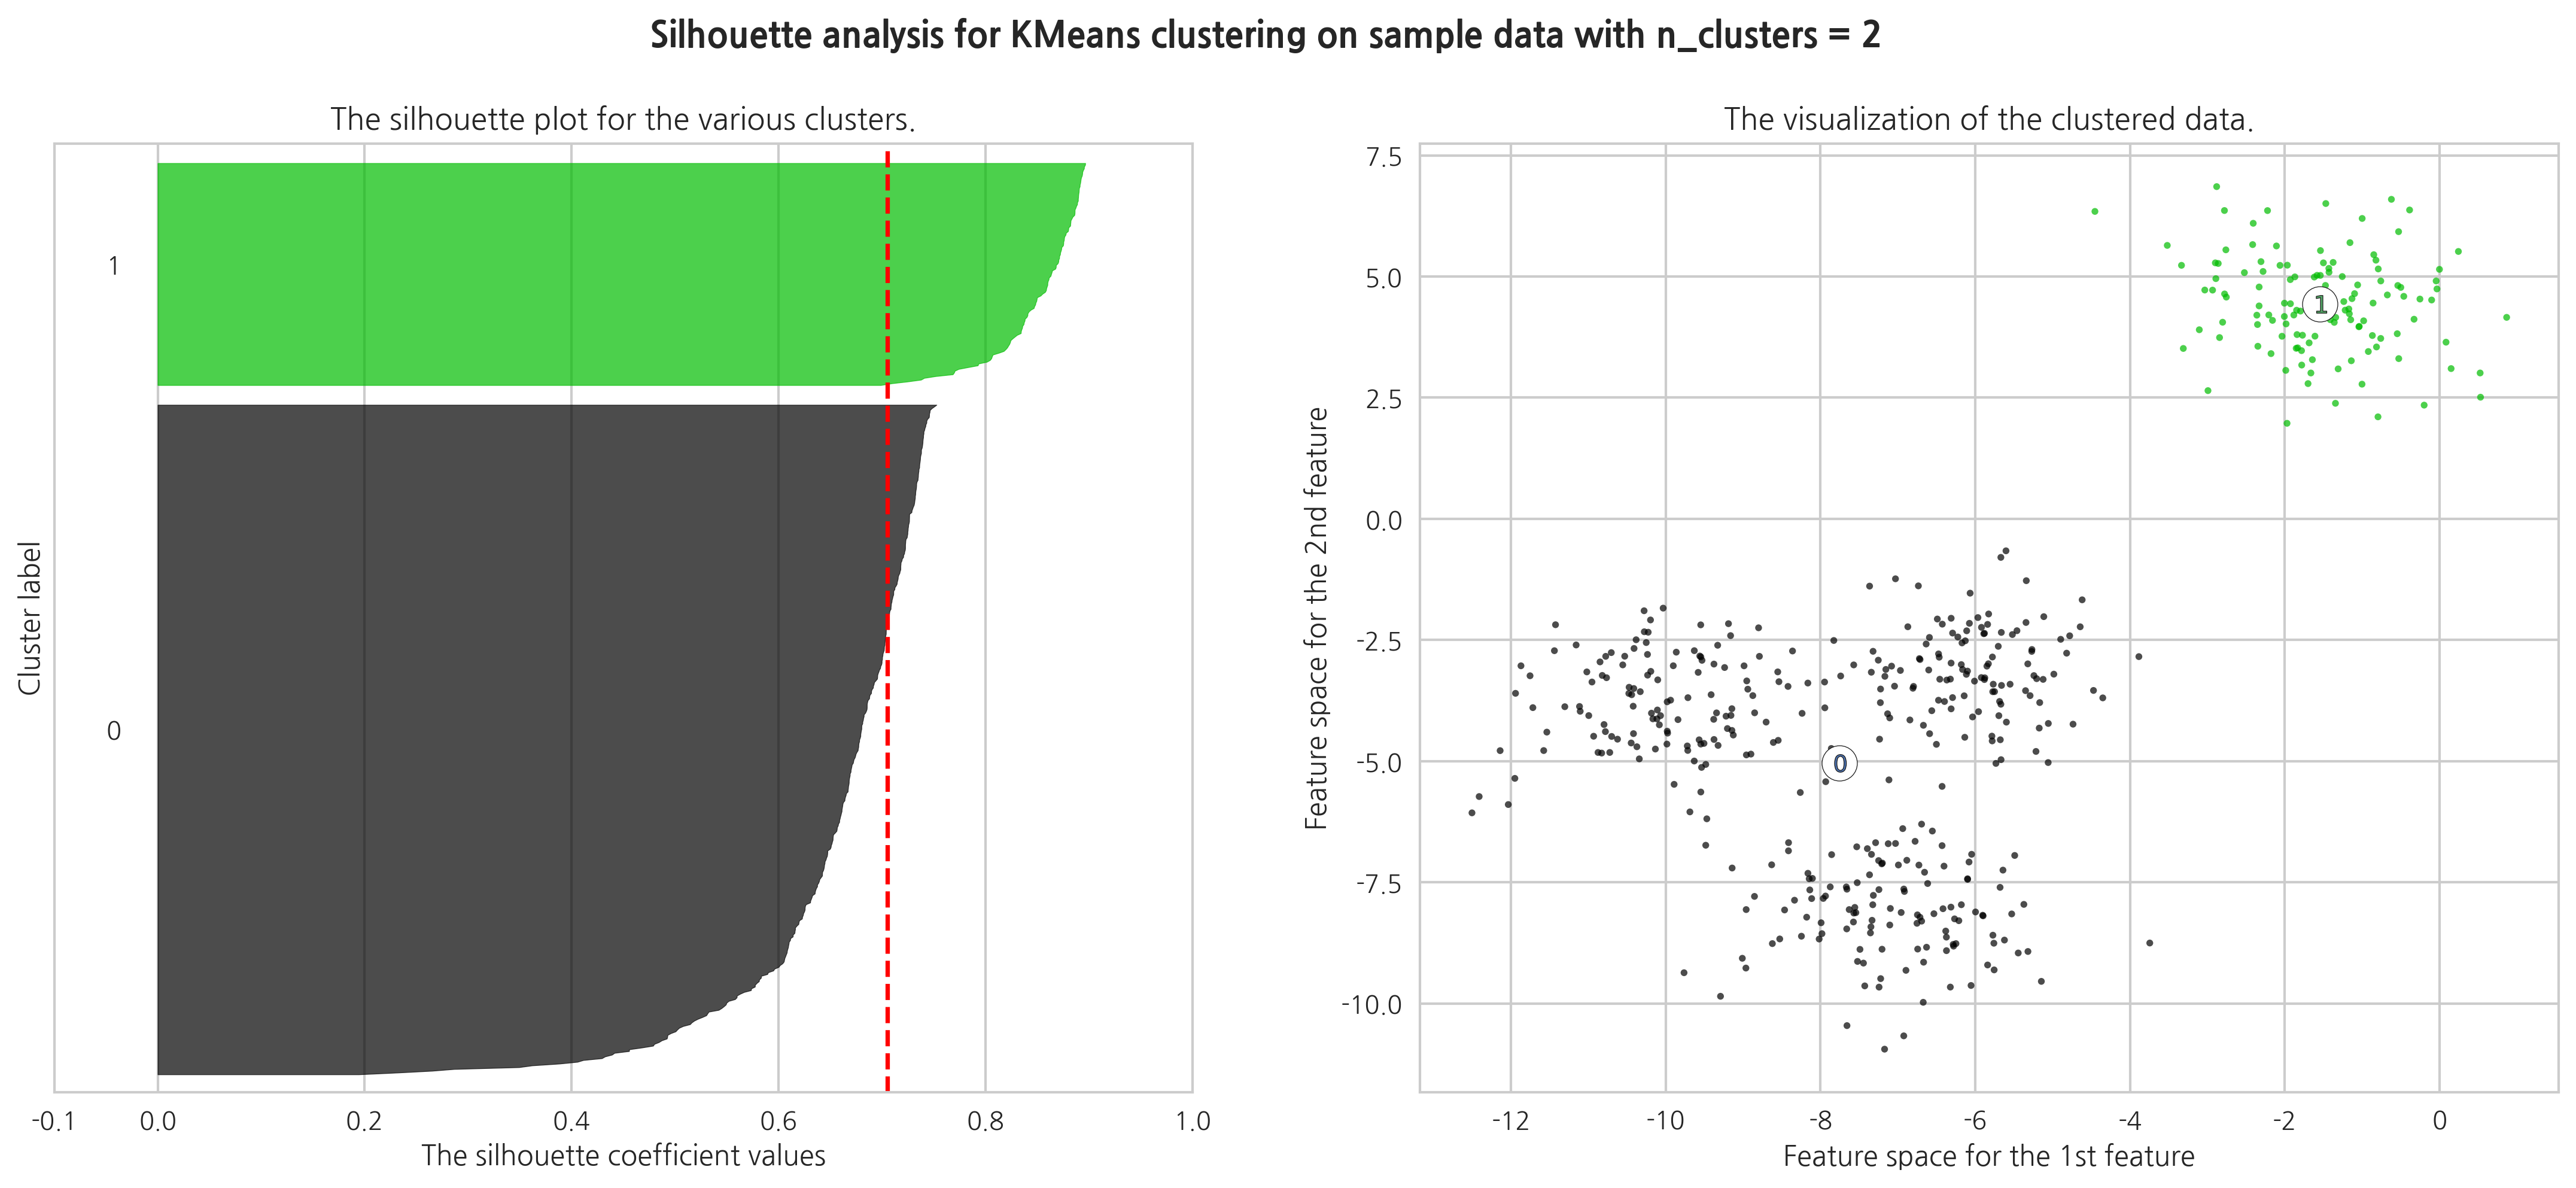

For n_clusters = 3 The average silhouette_score is : 0.588200401213


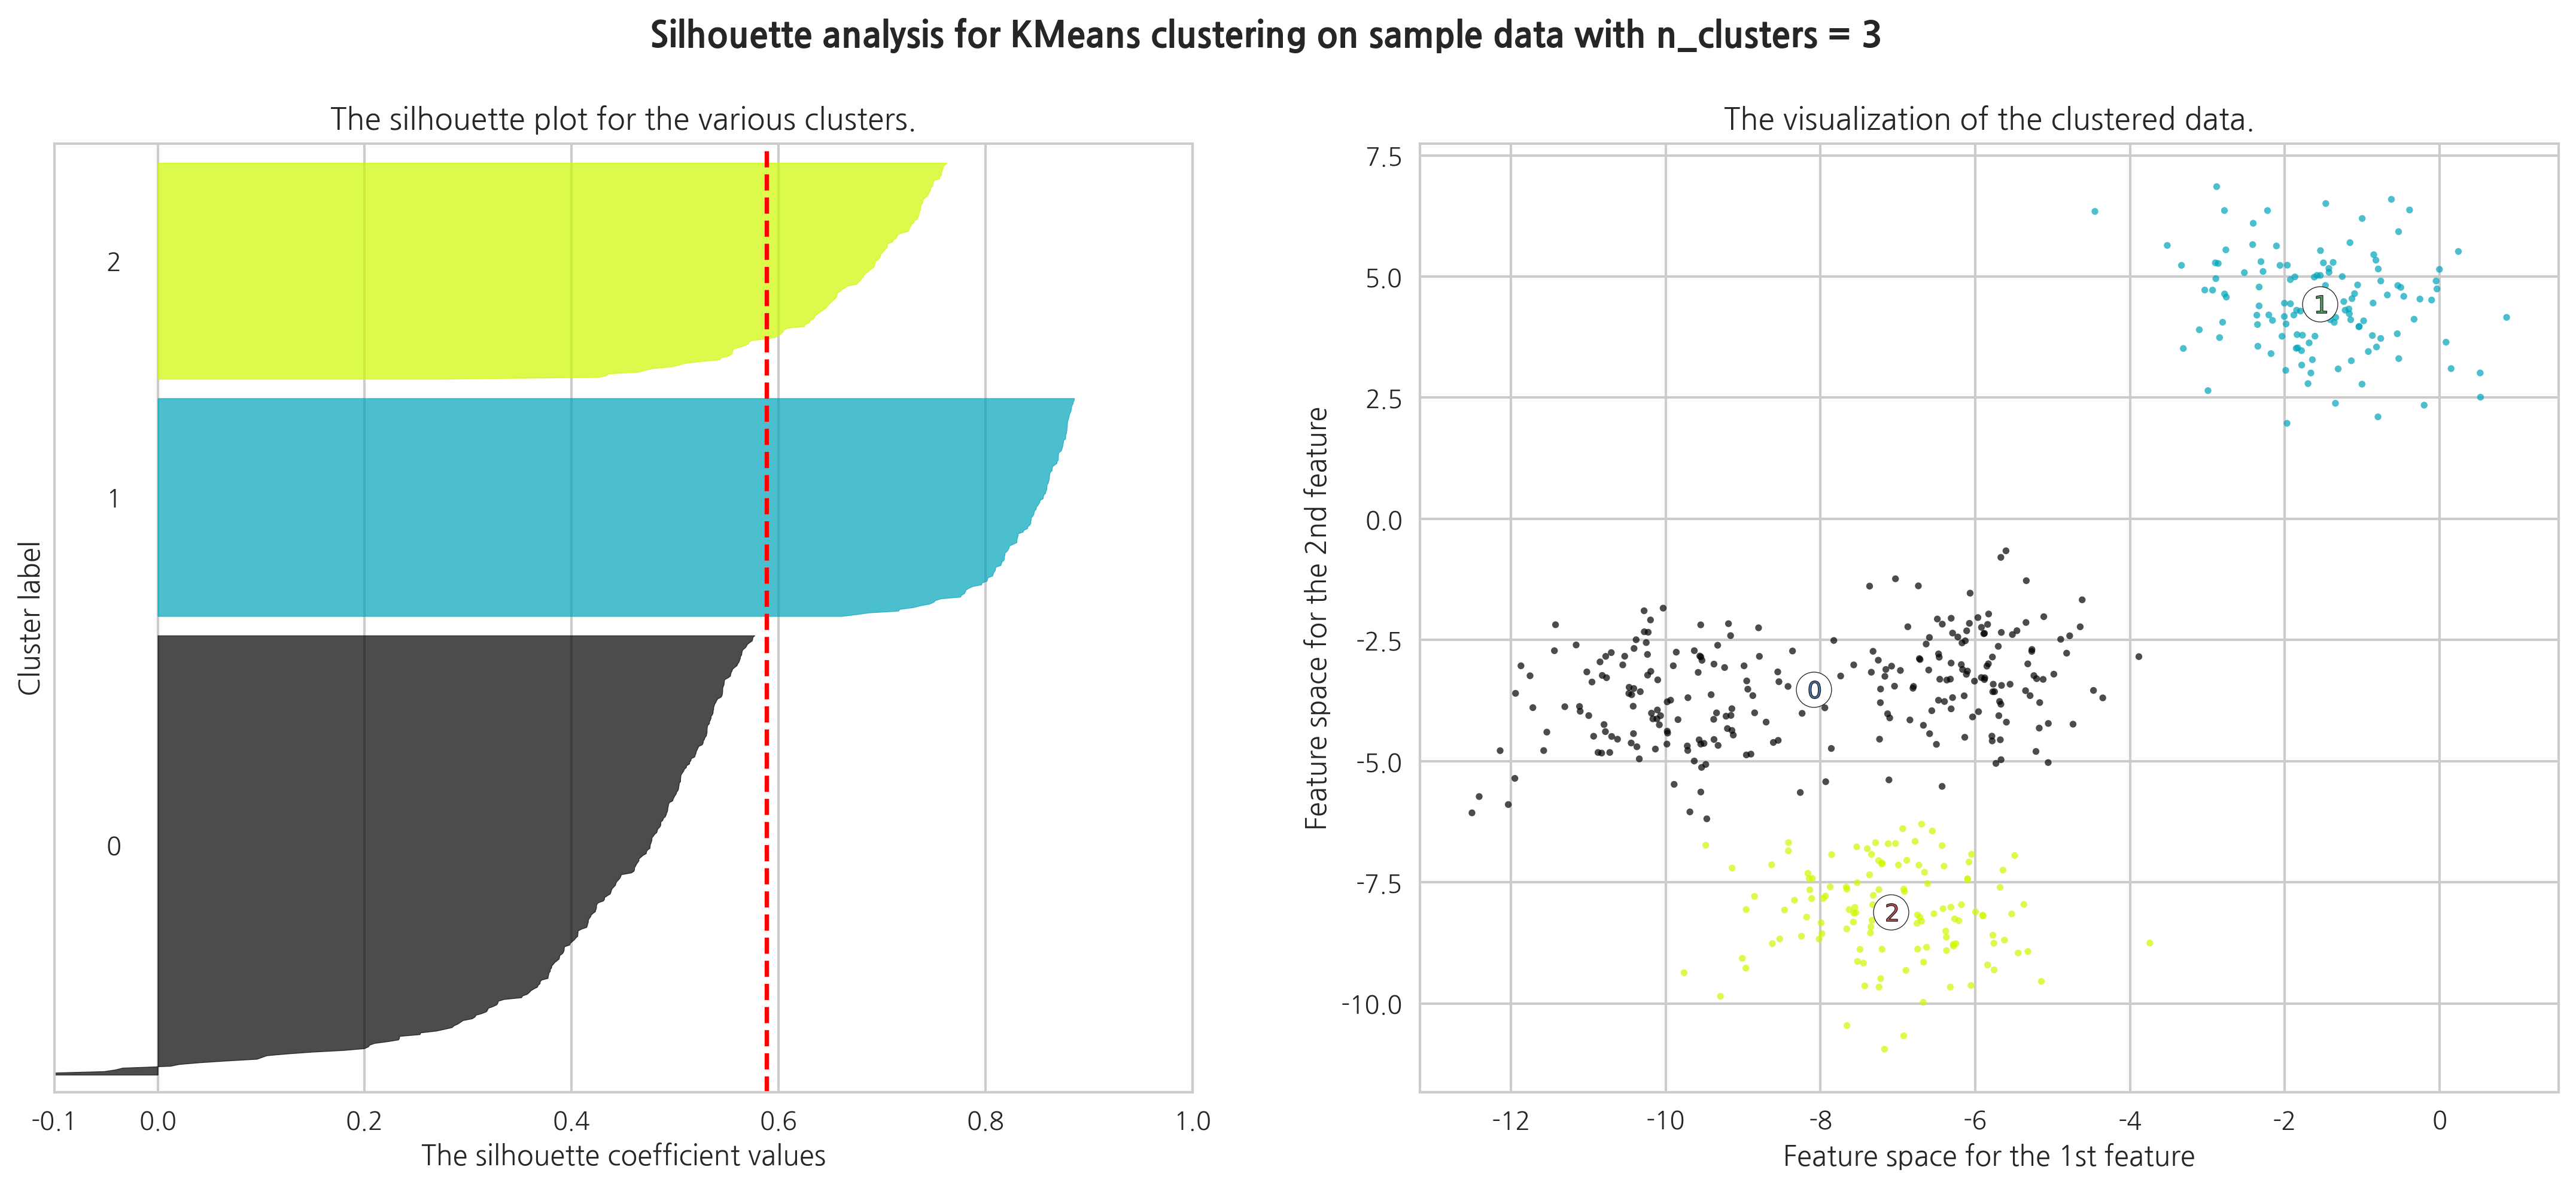

For n_clusters = 4 The average silhouette_score is : 0.650518663273


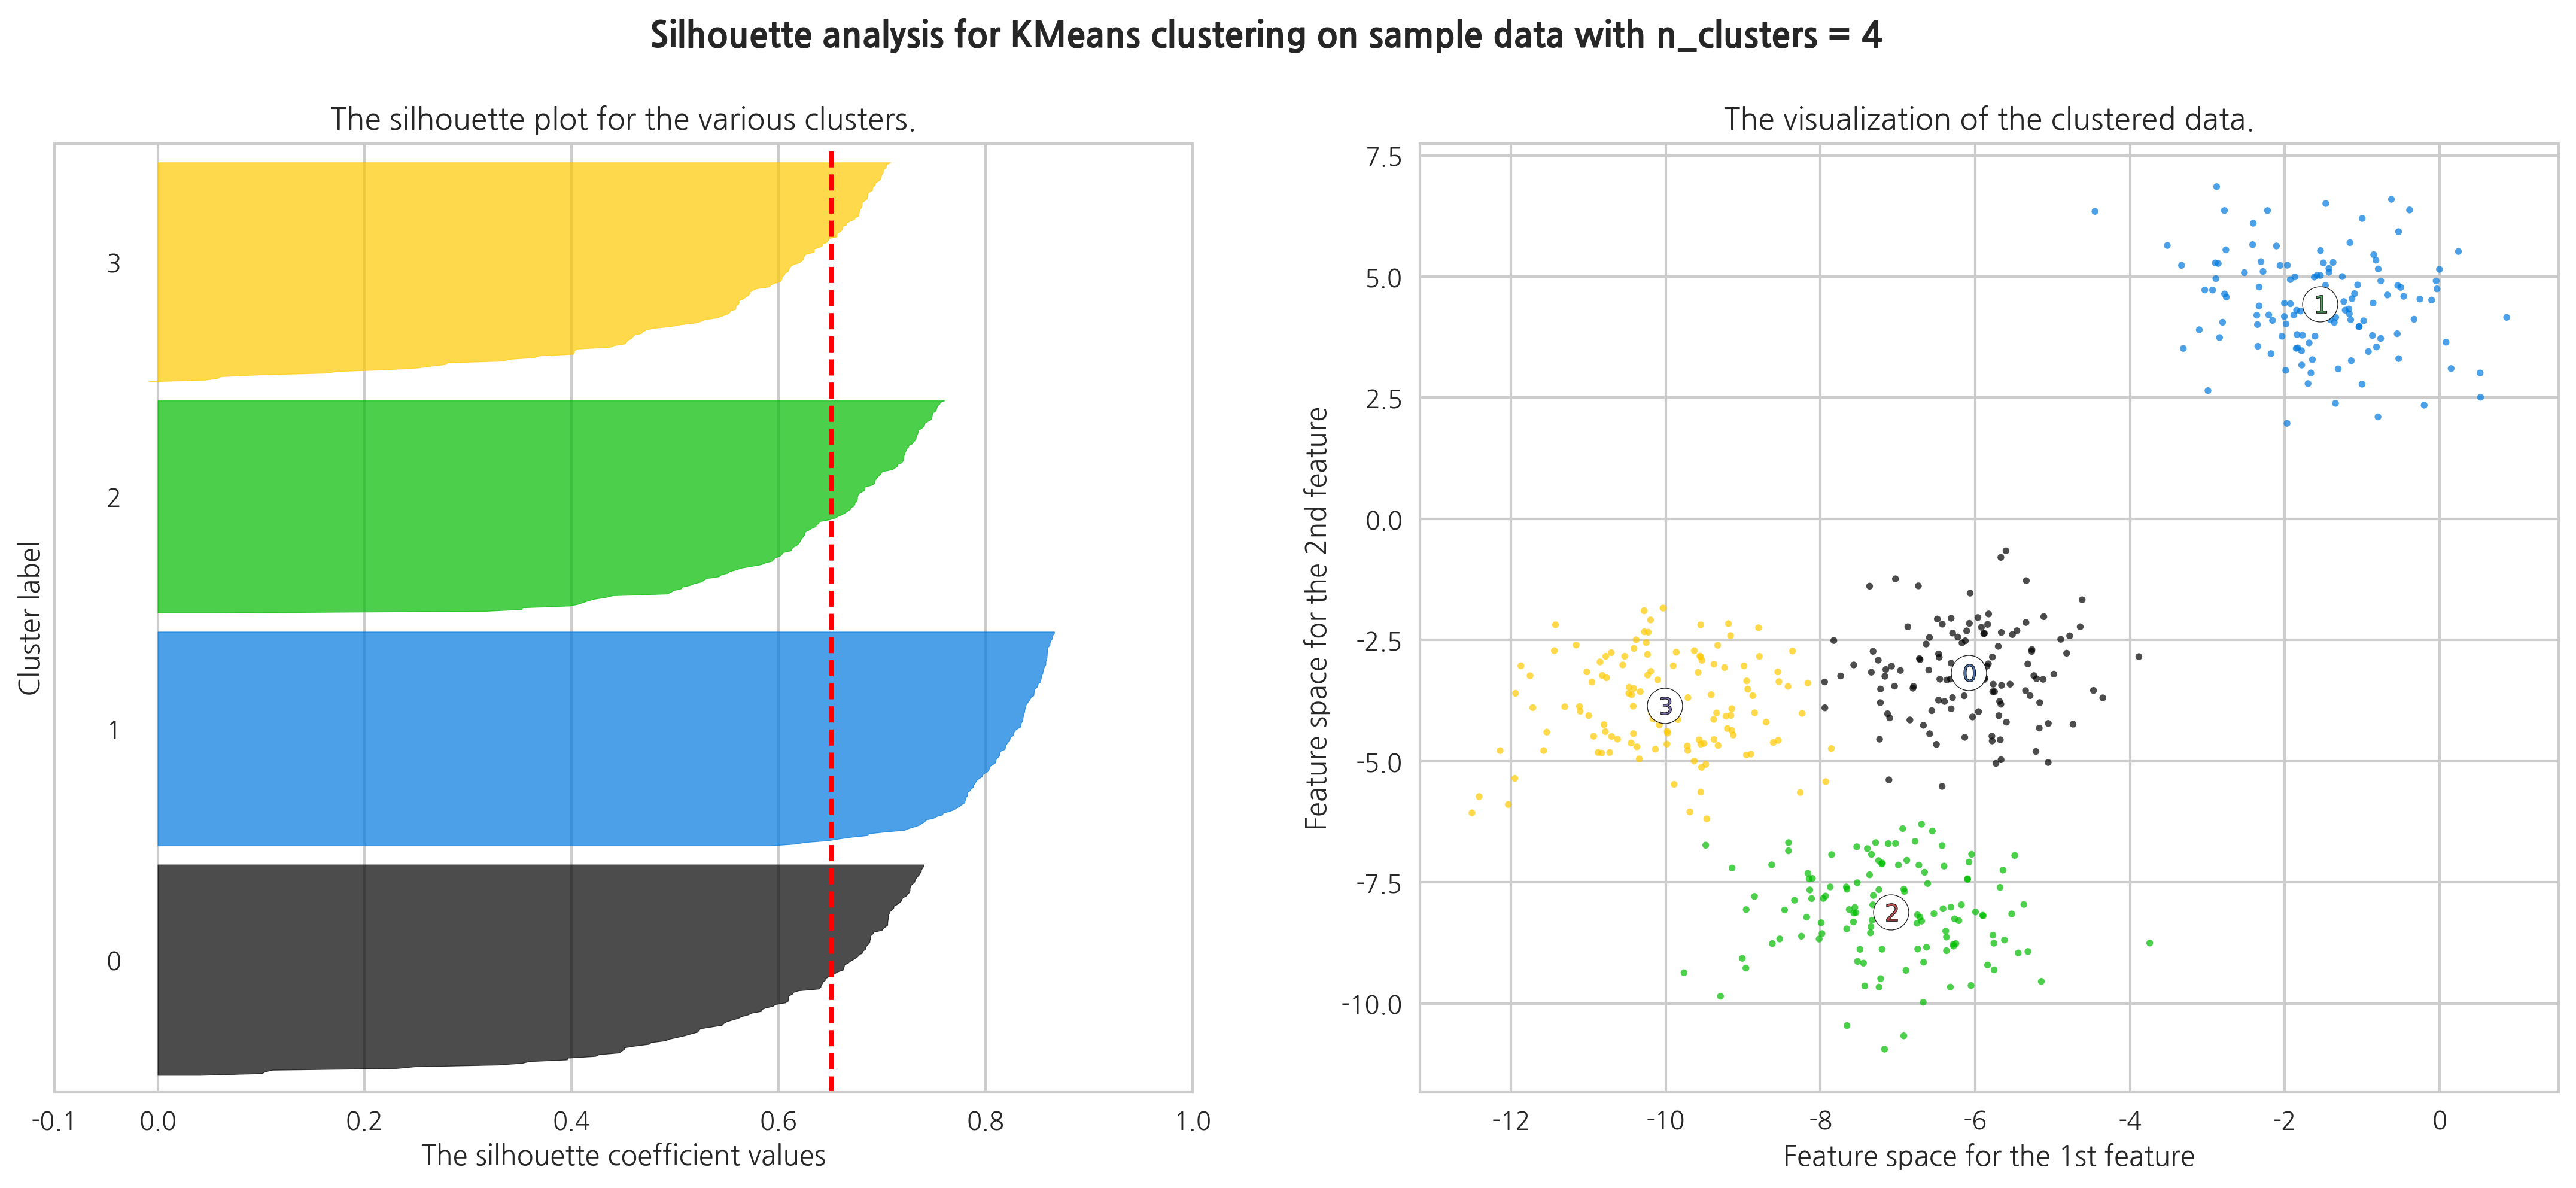

For n_clusters = 5 The average silhouette_score is : 0.563764690262


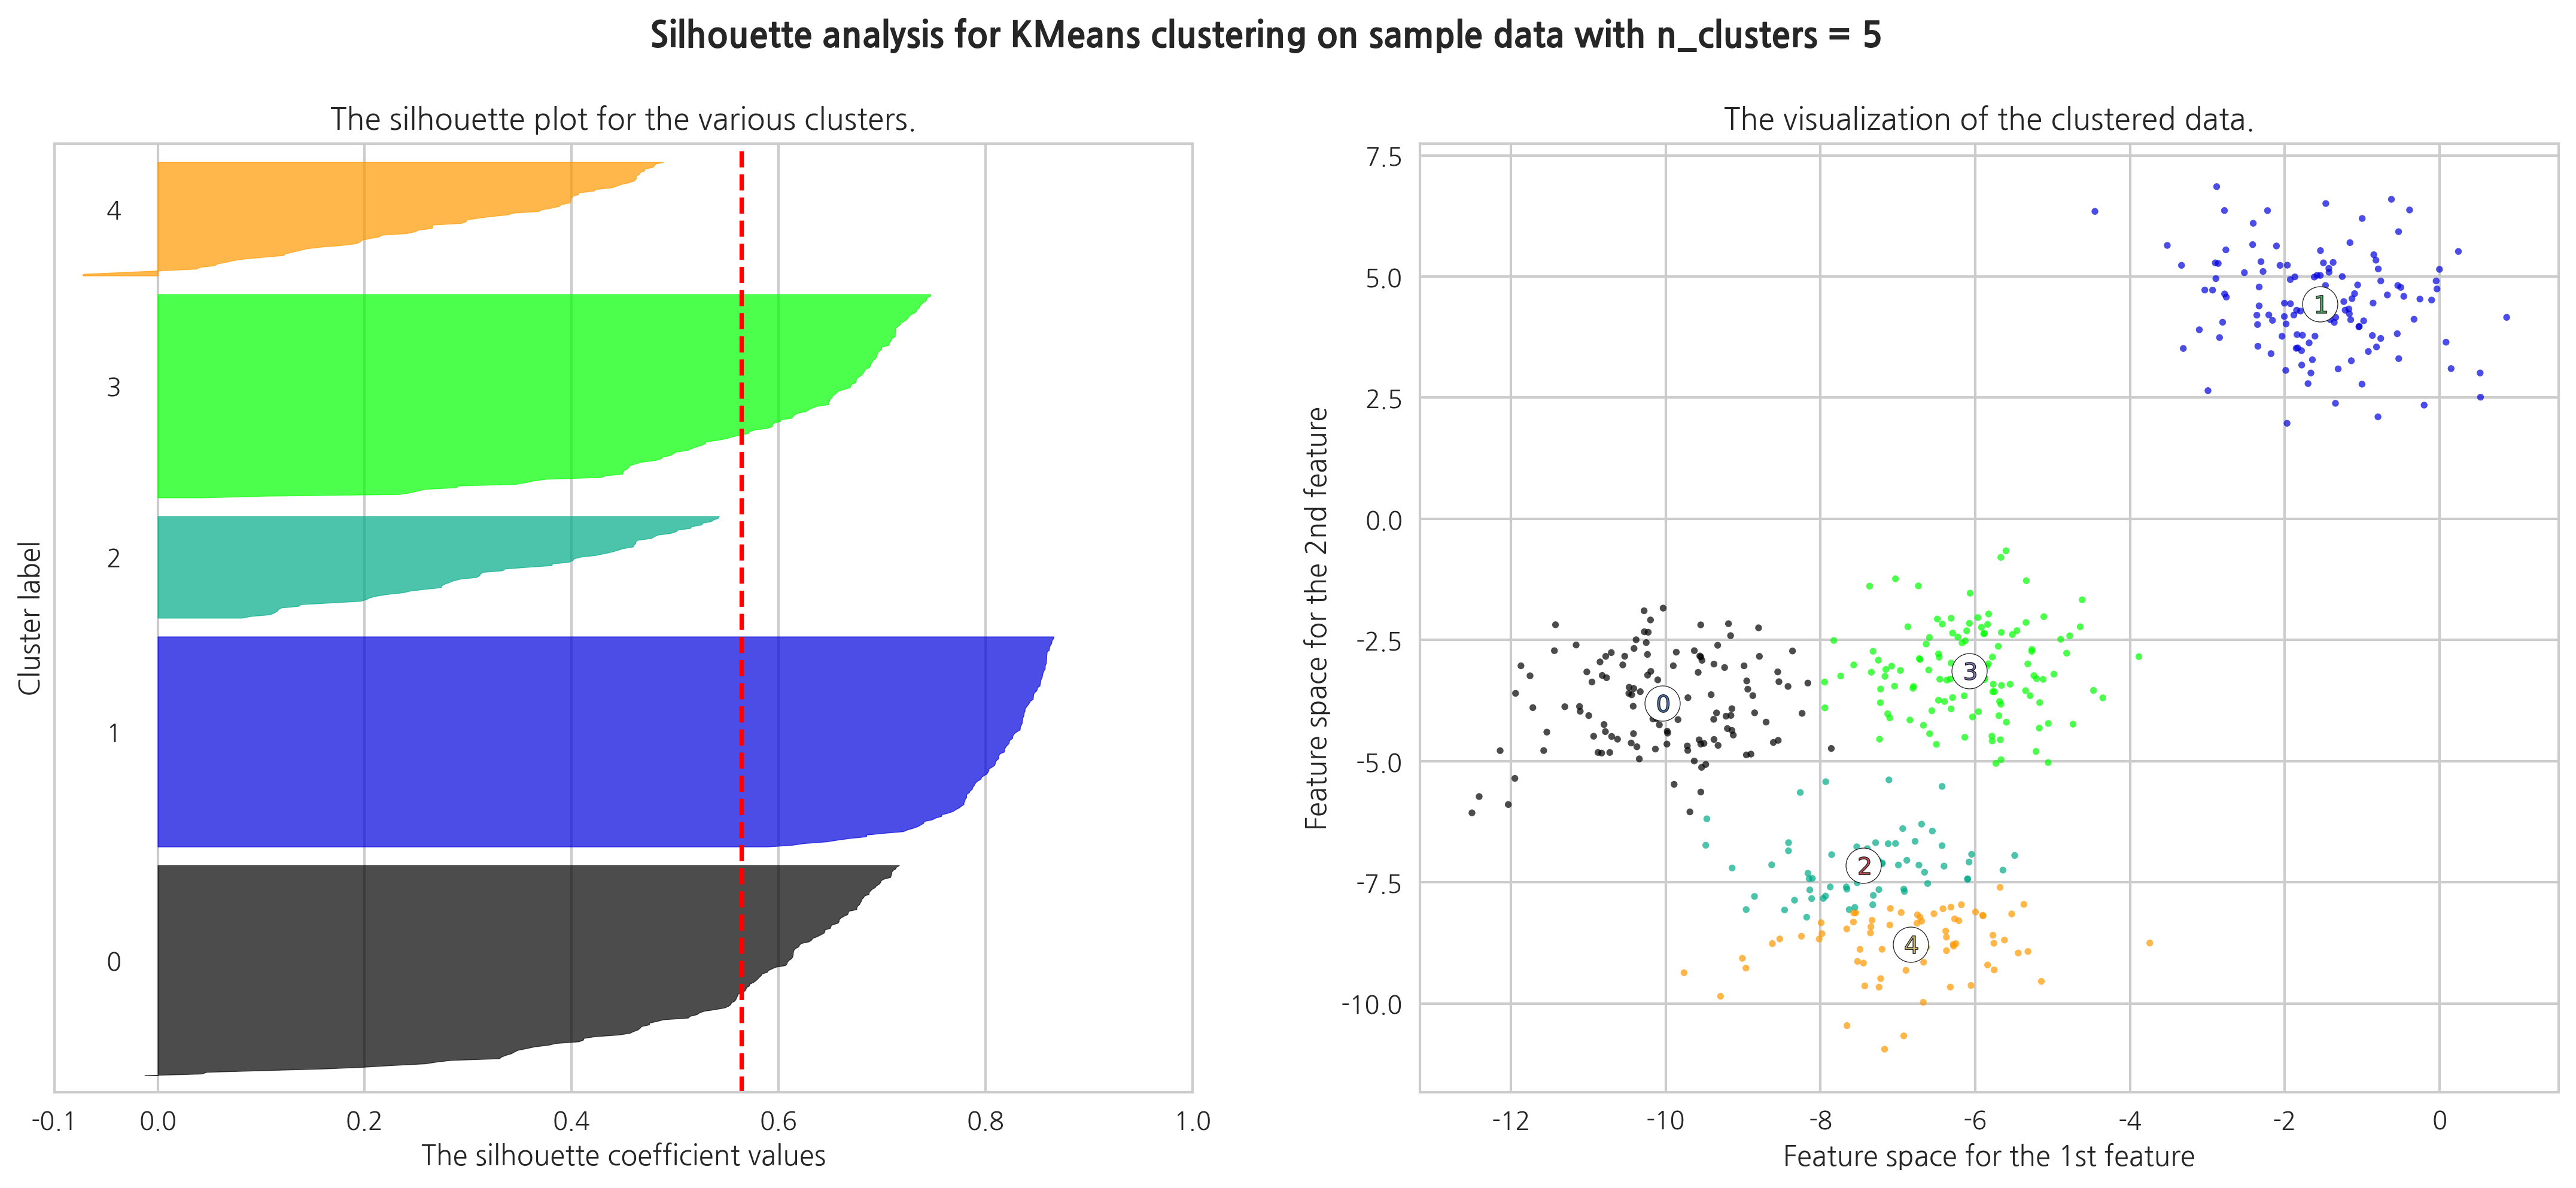

For n_clusters = 6 The average silhouette_score is : 0.450466629437


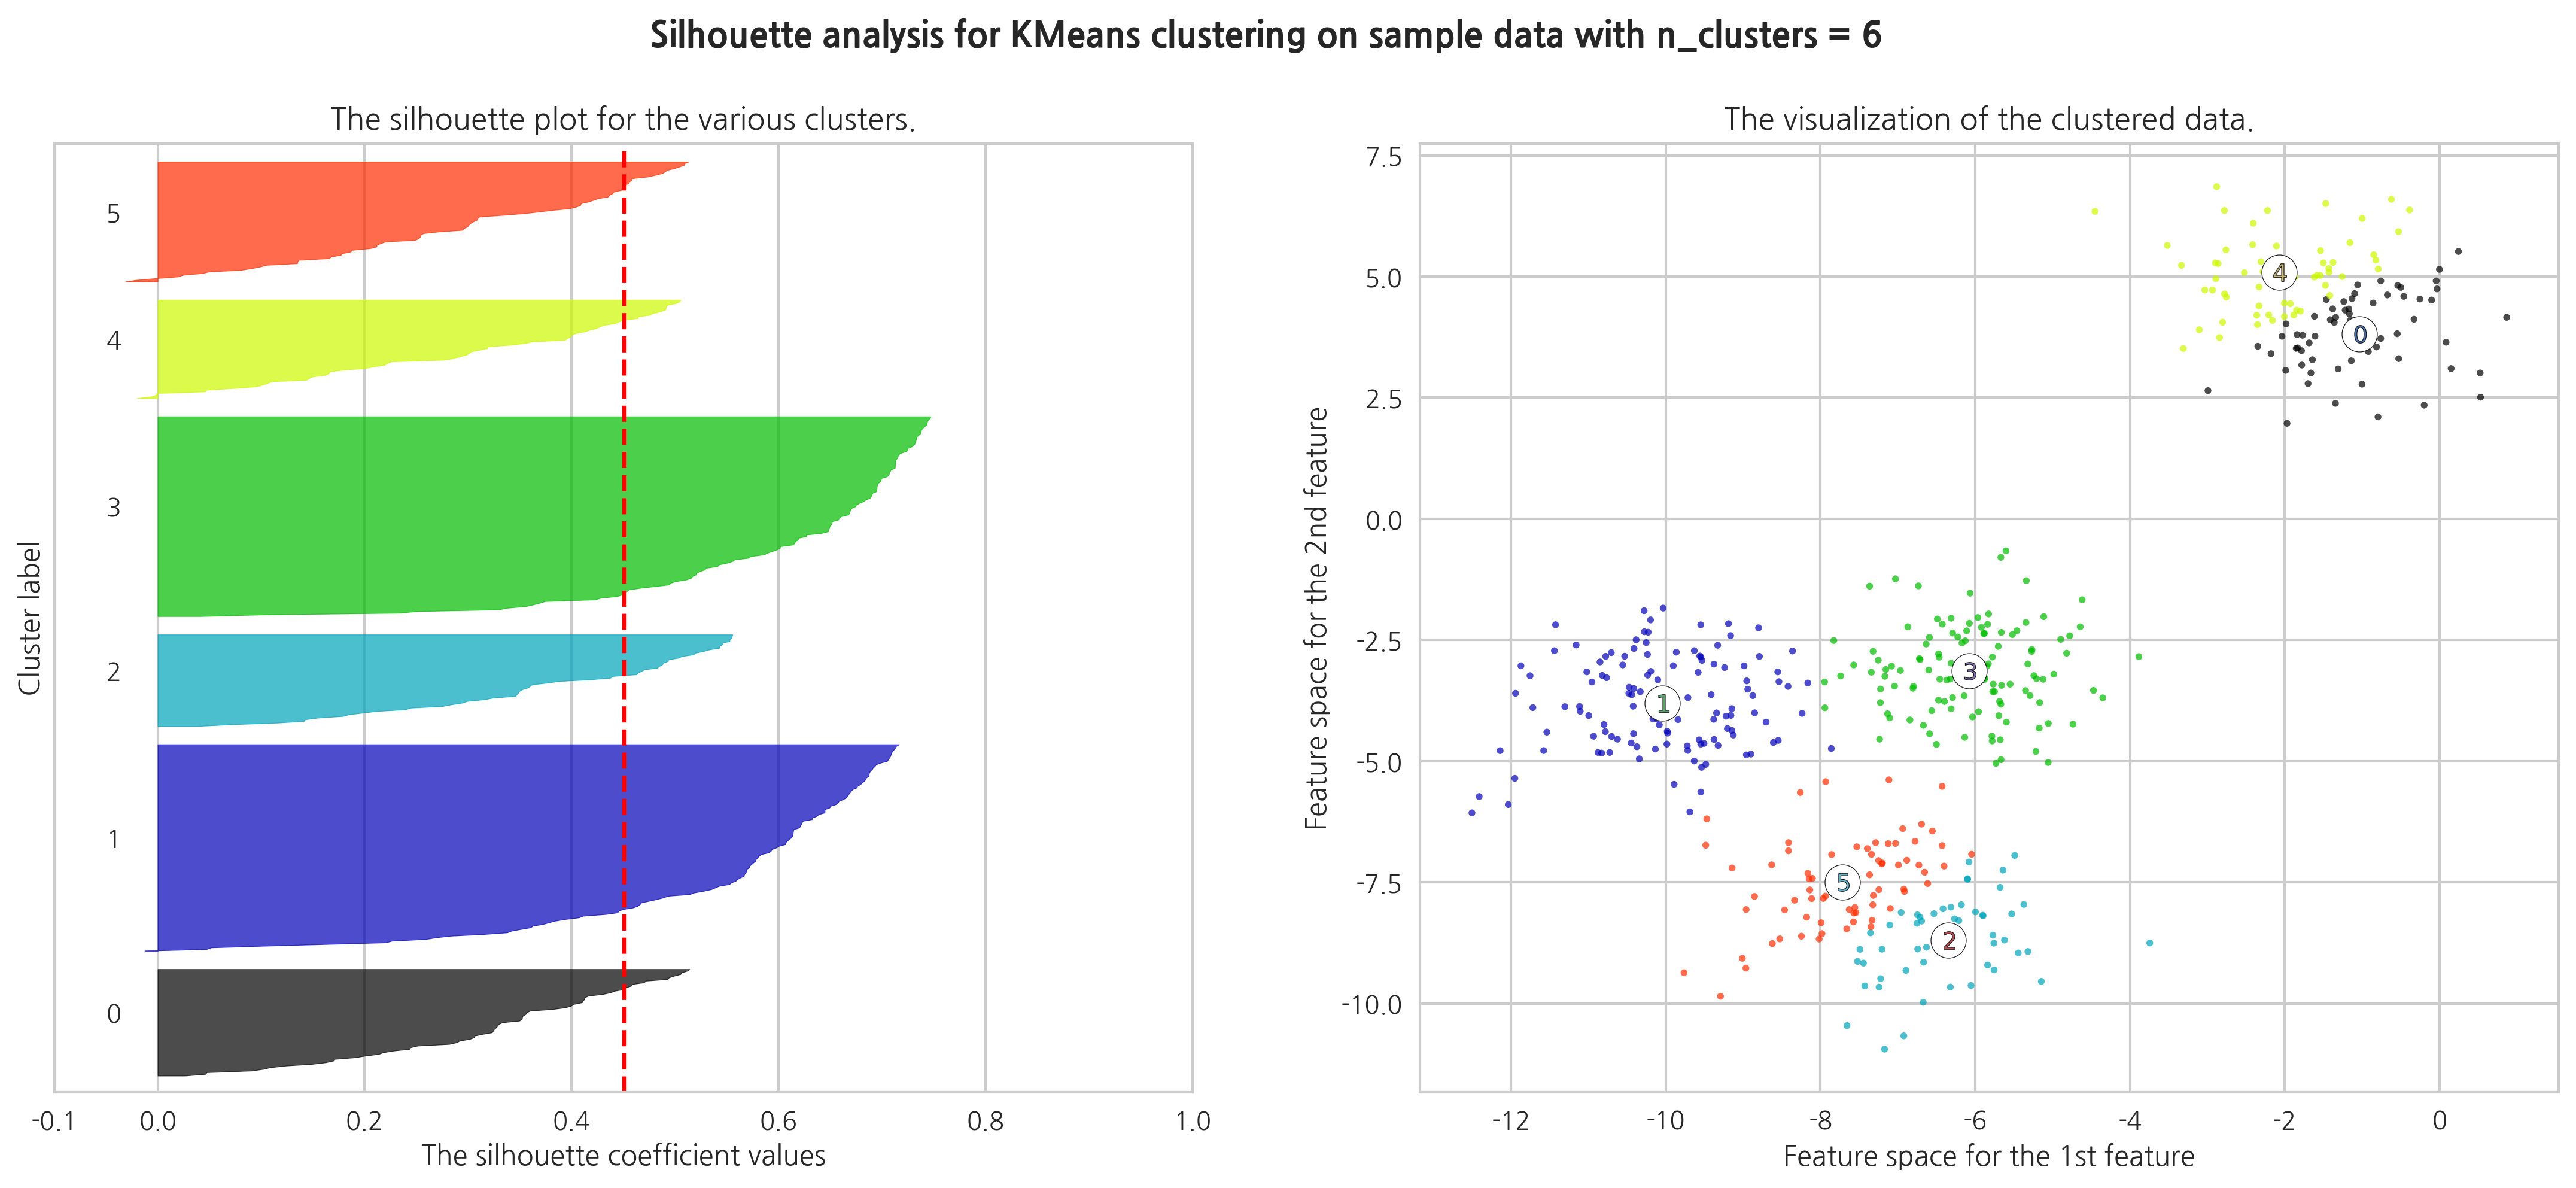

In [47]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()